<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/Copia_de_Vowels_Classifier_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports and GitHub**

In [28]:
!pip install pydub

In [61]:
import numpy as np
import os
from google.colab import drive
import sys
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
from pydub import AudioSegment
import wave

#**Importación de los datos**

Para empezar, debemos cargar la base de datos desde *google drive*. Para esto, utilizamos el modulo **drive**. Una vez realizada la interfaz desde *colab*, navegamos entre las carpetas hasta la ruta: ***content/drive/My Drive/Proyecto Clasificación de Vocales)***.

In [30]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


A continuación, accedemos al contenido de la ruta. Nos percatamos de que en ella existen tres carpetas: **A**, **E**, **I**, **O** Y **U**, cada una de las cuales contiene una colección de notas de voz de *Whatsapp* (archivos **.ogg**) convertidos a archivos **.wav**. Estos archivos corresponden a una muestra aleatoria tomada por los estudiantes del curso de *Aprendizaje Automático de Máquina*, compuesta en su mayoría por voces de jovenes adultos (compañeros de **MACC**).

In [31]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales"

A  convert.ipynb  E  I	O  U  Untitled0.ipynb


Antes de continuar, por si acaso, reescribimos los archivos en una ruta local como archivos con extensión **.wav**. Para esto utilizamos el módulo *pydub*.

In [62]:
path = "/content/drive/My Drive/Proyecto Clasificación de Vocales/"
route = "WAVs/"
vocales = ['A', 'E', 'I', 'O', 'U']
for vocal in vocales:
    for audio in os.listdir(path+vocal):
        print(audio)
        open(route+audio, 'w')
        wave.open(route+audio,'wb')

A_005.wav
A_014.wav
A_020.wav
A_010.wav
A_013.wav
A_015.wav
A_018.wav
A_007.wav
A_008.wav
A_019.wav
A_022.wav
A_021.wav
A_017.wav
A_012.wav
A_009.wav
A_011.wav
A_004.wav
A_023.wav
A_002.wav
A_003.wav
A_006.wav
A_001.wav
A_016.wav
A_047.wav
A_056.wav
A_045.wav
A_053.wav
A_063.wav
A_028.wav
A_052.wav


Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327

A_034.wav
A_055.wav
A_054.wav
A_067.wav
A_038.wav
A_041.wav
A_058.wav
A_046.wav
A_029.wav
A_061.wav
A_048.wav
A_043.wav
A_070.wav
A_071.wav
A_026.wav
A_032.wav
A_024.wav
A_036.wav
A_025.wav
A_027.wav
A_069.wav
A_039.wav
A_064.wav
A_040.wav
A_060.wav
A_049.wav
A_037.wav
A_033.wav
A_066.wav
A_030.wav
A_042.wav
A_068.wav
A_035.wav
A_057.wav


    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 

A_031.wav
A_050.wav
A_065.wav
A_044.wav
A_062.wav
A_051.wav
A_059.wav
A_072.wav
A_073.wav
A_074.wav
A_075.wav
A_076.wav
A_077.wav
A_078.wav
A_079.wav
A_080.wav
A_081.wav
A_082.wav
A_083.wav
A_084.wav
A_085.wav
A_086.wav
A_088.wav
A_087.wav
A_089.wav


    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified'

A_090.wav
A_91.wav
A_92.wav
A_93.wav
A_94.wav
A_95.wav
A_96.wav
A_97.wav
A_98.wav
A_99.wav
A_100.wav
E_017.wav
E_013.wav
E_004.wav
E_010.wav
E_018.wav
E_019.wav
E_002.wav
E_012.wav
E_008.wav
E_016.wav
E_006.wav
E_005.wav
E_001.wav
E_014.wav
E_011.wav
E_015.wav
E_007.wav


    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 

E_020.wav
E_009.wav
E_056.wav
E_061.wav
E_021.wav
E_024.wav
E_051.wav
E_031.wav
E_038.wav
E_040.wav
E_046.wav
E_028.wav
E_069.wav
E_052.wav
E_054.wav
E_041.wav
E_025.wav
E_036.wav
E_044.wav
E_067.wav
E_023.wav
E_053.wav
E_026.wav
E_037.wav
E_057.wav
E_035.wav
E_065.wav
E_029.wav
E_039.wav
E_033.wav
E_030.wav
E_048.wav
E_058.wav
E_060.wav
E_047.wav
E_063.wav
E_064.wav


wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "

E_043.wav
E_055.wav
E_050.wav
E_062.wav
E_059.wav
E_068.wav
E_034.wav
E_066.wav
E_032.wav
E_042.wav
E_027.wav
E_045.wav
E_022.wav
E_049.wav
E_071.wav
E_070.wav
E_072.wav
e_073.wav
E_074.wav
E_075.wav
E_076.wav
E_077.wav
E_078.wav
E_079.wav
E_080.wav
E_081.wav
E_82.wav
E_83.wav
E_84.wav
E_85.wav


    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified'

E_86.wav
E_87.wav
E_88.wav
E_89.wav
E_90.wav
E_91.wav
E_92.wav
E_93.wav
E_94.wav
E_95.wav
E_96.wav
E_97.wav
E_98.wav
E_99.wav
E_100.wav
I_021.wav
I_026.wav
I_024.wav
I_012.wav
I_016.wav
I_047.wav
I_027.wav
I_030.wav
I_031.wav
I_017.wav


    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 

I_009.wav
I_018.wav
I_015.wav
I_020.wav
I_002.wav
I_041.wav
I_040.wav
I_043.wav
I_034.wav
I_048.wav
I_010.wav
I_033.wav
I_001.wav
I_028.wav
I_045.wav
I_035.wav
I_005.wav
I_050.wav
I_036.wav
I_046.wav
I_019.wav
I_004.wav
I_039.wav
I_014.wav
I_044.wav
I_038.wav
I_011.wav
I_032.wav
I_013.wav
I_022.wav
I_042.wav
I_008.wav
I_037.wav
I_023.wav
I_003.wav


# channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/pyt

I_029.wav
I_006.wav
I_025.wav
I_007.wav
I_067.wav
I_055.wav
I_054.wav
I_069.wav
I_059.wav
I_071.wav
I_063.wav
I_052.wav
I_066.wav
I_057.wav
I_061.wav
I_065.wav
I_058.wav
I_062.wav
I_056.wav
I_060.wav
I_068.wav
I_053.wav
I_070.wav
I_051.wav
I_064.wav
I_72.wav
I_73.wav
I_74.wav
I_75.wav


    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 

I_76.wav
I_77.wav
I_78.wav
I_79.wav
I_80.wav
I_81.wav
I_82.wav
I_83.wav
I_84.wav
I_85.wav
I_86.wav
I_87.wav
I_88.wav
I_89.wav
I_90.wav
I_91.wav
I_92.wav
I_93.wav
I_94.wav
I_95.wav
I_96.wav
I_97.wav
I_98.wav
I_99.wav
I_100.wav


Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327

O_017.wav
O_006.wav
O_022.wav
O_009.wav
O_018.wav
O_002.wav
O_026.wav
O_023.wav
O_004.wav
O_001.wav
O_012.wav
O_027.wav
O_020.wav
O_011.wav
O_021.wav
O_015.wav
O_010.wav
O_003.wav
O_005.wav
O_016.wav
O_007.wav
O_025.wav
O_008.wav
O_024.wav
O_019.wav
O_013.wav
O_031.wav
O_039.wav
O_066.wav
O_062.wav
O_067.wav
O_055.wav
O_042.wav
O_036.wav
O_050.wav
O_049.wav


Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327

O_044.wav
O_043.wav
O_063.wav
O_047.wav
O_054.wav
O_030.wav
O_059.wav
O_041.wav
O_064.wav
O_056.wav
O_040.wav
O_053.wav
O_048.wav
O_070.wav
O_065.wav
O_032.wav
O_060.wav
O_058.wav
O_035.wav
O_052.wav
O_068.wav
O_045.wav
O_033.wav
O_051.wav
O_069.wav
O_037.wav
O_061.wav
O_071.wav
O_046.wav
O_057.wav
O_029.wav
O_028.wav


Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327

O_034.wav
O_038.wav
O_72.wav
O_73.wav
O_74.wav
O_75.wav
O_76.wav
O_77.wav
O_78.wav
O_79.wav
O_80.wav
O_81.wav
O_82.wav
O_83.wav
O_84.wav
O_85.wav
O_86.wav
O_87.wav
O_88.wav
O_89.wav
O_90.wav
O_91.wav
O_92.wav
O_93.wav
O_94.wav
O_95.wav
O_96.wav
O_97.wav


    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>

O_98.wav
O_99.wav
O_100.wav
U_011.wav
U_003.wav
U_007.wav
U_002.wav
U_005.wav
U_009.wav
U_004.wav
U_001.wav
U_010.wav
U_008.wav
U_006.wav
U_060.wav
U_054.wav
U_047.wav
U_061.wav
U_019.wav
U_051.wav
U_018.wav
U_024.wav
U_041.wav
U_015.wav
U_027.wav
U_026.wav
U_059.wav
U_037.wav
U_056.wav
U_020.wav
U_044.wav
U_013.wav
U_022.wav
U_028.wav


    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified'

U_040.wav
U_050.wav
U_021.wav
U_049.wav
U_055.wav
U_052.wav
U_017.wav
U_058.wav
U_014.wav
U_031.wav
U_057.wav
U_048.wav
U_034.wav
U_035.wav
U_045.wav
U_012.wav
U_053.wav
U_038.wav
U_029.wav
U_032.wav
U_033.wav
U_016.wav
U_042.wav
U_046.wav
U_043.wav
U_023.wav
U_036.wav
U_025.wav


    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>

U_039.wav
U_062.wav
U_068.wav
U_065.wav
U_067.wav
U_071.wav
U_069.wav
U_063.wav
U_064.wav
U_066.wav
U_070.wav
U_72.wav
U_74.wav
U_73.wav
U_75.wav
U_76.wav
U_77.wav
U_78.wav
U_79.wav
U_80.wav
U_81.wav
U_82.wav
U_84.wav
U_83.wav
U_85.wav
U_86.wav
U_87.wav
U_88.wav
U_89.wav
U_90.wav
U_91.wav
U_92.wav
U_93.wav
U_94.wav
U_95.wav
U_97.wav
U_96.wav
U_98.wav
U_99.wav
U_100.wav
U_030.wav


Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f84ad95b3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327

Accediendo al contenido de la carpeta **A**

In [33]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/A"

A_001.wav  A_016.wav  A_031.wav  A_046.wav  A_061.wav  A_076.wav  A_100.wav
A_002.wav  A_017.wav  A_032.wav  A_047.wav  A_062.wav  A_077.wav  A_91.wav
A_003.wav  A_018.wav  A_033.wav  A_048.wav  A_063.wav  A_078.wav  A_92.wav
A_004.wav  A_019.wav  A_034.wav  A_049.wav  A_064.wav  A_079.wav  A_93.wav
A_005.wav  A_020.wav  A_035.wav  A_050.wav  A_065.wav  A_080.wav  A_94.wav
A_006.wav  A_021.wav  A_036.wav  A_051.wav  A_066.wav  A_081.wav  A_95.wav
A_007.wav  A_022.wav  A_037.wav  A_052.wav  A_067.wav  A_082.wav  A_96.wav
A_008.wav  A_023.wav  A_038.wav  A_053.wav  A_068.wav  A_083.wav  A_97.wav
A_009.wav  A_024.wav  A_039.wav  A_054.wav  A_069.wav  A_084.wav  A_98.wav
A_010.wav  A_025.wav  A_040.wav  A_055.wav  A_070.wav  A_085.wav  A_99.wav
A_011.wav  A_026.wav  A_041.wav  A_056.wav  A_071.wav  A_086.wav
A_012.wav  A_027.wav  A_042.wav  A_057.wav  A_072.wav  A_087.wav
A_013.wav  A_028.wav  A_043.wav  A_058.wav  A_073.wav  A_088.wav
A_014.wav  A_029.wav  A_044.wav  A_059.wav  A_074.wav 

In [34]:
path_A = '/content/drive/My Drive/Proyecto Clasificación de Vocales/A'
dir_path_A = os.path.dirname(os.path.realpath(path_A))
A_records = []
for root, dirs, files in os.walk(dir_path_A):
    for record in files:
        if record.startswith('A') and record.endswith('.wav'):
            A_records.append(record)

Accediendo al contenido de la carpeta **E**

In [35]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/E"

E_001.wav  E_017.wav  E_032.wav  E_047.wav  E_062.wav  E_077.wav  E_91.wav
E_002.wav  E_018.wav  E_033.wav  E_048.wav  E_063.wav  E_078.wav  E_92.wav
E_004.wav  E_019.wav  E_034.wav  E_049.wav  E_064.wav  E_079.wav  E_93.wav
E_005.wav  E_020.wav  E_035.wav  E_050.wav  E_065.wav  E_080.wav  E_94.wav
E_006.wav  E_021.wav  E_036.wav  E_051.wav  E_066.wav  E_081.wav  E_95.wav
E_007.wav  E_022.wav  E_037.wav  E_052.wav  E_067.wav  E_100.wav  E_96.wav
E_008.wav  E_023.wav  E_038.wav  E_053.wav  E_068.wav  E_82.wav   E_97.wav
E_009.wav  E_024.wav  E_039.wav  E_054.wav  E_069.wav  E_83.wav   E_98.wav
E_010.wav  E_025.wav  E_040.wav  E_055.wav  E_070.wav  E_84.wav   E_99.wav
E_011.wav  E_026.wav  E_041.wav  E_056.wav  E_071.wav  E_85.wav
E_012.wav  E_027.wav  E_042.wav  E_057.wav  E_072.wav  E_86.wav
E_013.wav  E_028.wav  E_043.wav  E_058.wav  e_073.wav  E_87.wav
E_014.wav  E_029.wav  E_044.wav  E_059.wav  E_074.wav  E_88.wav
E_015.wav  E_030.wav  E_045.wav  E_060.wav  E_075.wav  E_89.wav
E_016

In [36]:
path_E = '/content/drive/My Drive/Proyecto Clasificación de Vocales/E'
dir_path_E = os.path.dirname(os.path.realpath(path_E))
E_records = []
for root, dirs, files in os.walk(dir_path_E):
    for record in files:
        if record.startswith('E') and record.endswith('.wav'):
            E_records.append(record)

Accediendo al contenido de la carpeta **I**

In [37]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/I"

I_001.wav  I_016.wav  I_031.wav  I_046.wav  I_062.wav  I_76.wav  I_91.wav
I_002.wav  I_017.wav  I_032.wav  I_047.wav  I_063.wav  I_77.wav  I_92.wav
I_003.wav  I_018.wav  I_033.wav  I_048.wav  I_064.wav  I_78.wav  I_93.wav
I_004.wav  I_019.wav  I_034.wav  I_050.wav  I_065.wav  I_79.wav  I_94.wav
I_005.wav  I_020.wav  I_035.wav  I_051.wav  I_066.wav  I_80.wav  I_95.wav
I_006.wav  I_021.wav  I_036.wav  I_052.wav  I_067.wav  I_81.wav  I_96.wav
I_007.wav  I_022.wav  I_037.wav  I_053.wav  I_068.wav  I_82.wav  I_97.wav
I_008.wav  I_023.wav  I_038.wav  I_054.wav  I_069.wav  I_83.wav  I_98.wav
I_009.wav  I_024.wav  I_039.wav  I_055.wav  I_070.wav  I_84.wav  I_99.wav
I_010.wav  I_025.wav  I_040.wav  I_056.wav  I_071.wav  I_85.wav
I_011.wav  I_026.wav  I_041.wav  I_057.wav  I_100.wav  I_86.wav
I_012.wav  I_027.wav  I_042.wav  I_058.wav  I_72.wav   I_87.wav
I_013.wav  I_028.wav  I_043.wav  I_059.wav  I_73.wav   I_88.wav
I_014.wav  I_029.wav  I_044.wav  I_060.wav  I_74.wav   I_89.wav
I_015.wav  I_0

In [38]:
path_I = '/content/drive/My Drive/Proyecto Clasificación de Vocales/I'
dir_path_I = os.path.dirname(os.path.realpath(path_I))
I_records = []
for root, dirs, files in os.walk(dir_path_I):
    for record in files:
        if record.startswith('I') and record.endswith('.wav'):
            I_records.append(record)

Accediendo al contenido de la carpeta **O**

In [39]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/O"

O_001.wav  O_017.wav  O_032.wav  O_047.wav  O_062.wav  O_76.wav  O_91.wav
O_002.wav  O_018.wav  O_033.wav  O_048.wav  O_063.wav  O_77.wav  O_92.wav
O_003.wav  O_019.wav  O_034.wav  O_049.wav  O_064.wav  O_78.wav  O_93.wav
O_004.wav  O_020.wav  O_035.wav  O_050.wav  O_065.wav  O_79.wav  O_94.wav
O_005.wav  O_021.wav  O_036.wav  O_051.wav  O_066.wav  O_80.wav  O_95.wav
O_006.wav  O_022.wav  O_037.wav  O_052.wav  O_067.wav  O_81.wav  O_96.wav
O_007.wav  O_023.wav  O_038.wav  O_053.wav  O_068.wav  O_82.wav  O_97.wav
O_008.wav  O_024.wav  O_039.wav  O_054.wav  O_069.wav  O_83.wav  O_98.wav
O_009.wav  O_025.wav  O_040.wav  O_055.wav  O_070.wav  O_84.wav  O_99.wav
O_010.wav  O_026.wav  O_041.wav  O_056.wav  O_071.wav  O_85.wav
O_011.wav  O_027.wav  O_042.wav  O_057.wav  O_100.wav  O_86.wav
O_012.wav  O_028.wav  O_043.wav  O_058.wav  O_72.wav   O_87.wav
O_013.wav  O_029.wav  O_044.wav  O_059.wav  O_73.wav   O_88.wav
O_015.wav  O_030.wav  O_045.wav  O_060.wav  O_74.wav   O_89.wav
O_016.wav  O_0

In [40]:
path_O = '/content/drive/My Drive/Proyecto Clasificación de Vocales/O'
dir_path_O = os.path.dirname(os.path.realpath(path_O))
O_records = []
for root, dirs, files in os.walk(dir_path_O):
    for record in files:
        if record.startswith('O') and record.endswith('.wav'):
            O_records.append(record)

Accediendo al contenido de la carpeta **U**

In [41]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/U"

U_001.wav  U_016.wav  U_031.wav  U_046.wav  U_061.wav  U_75.wav  U_90.wav
U_002.wav  U_017.wav  U_032.wav  U_047.wav  U_062.wav  U_76.wav  U_91.wav
U_003.wav  U_018.wav  U_033.wav  U_048.wav  U_063.wav  U_77.wav  U_92.wav
U_004.wav  U_019.wav  U_034.wav  U_049.wav  U_064.wav  U_78.wav  U_93.wav
U_005.wav  U_020.wav  U_035.wav  U_050.wav  U_065.wav  U_79.wav  U_94.wav
U_006.wav  U_021.wav  U_036.wav  U_051.wav  U_066.wav  U_80.wav  U_95.wav
U_007.wav  U_022.wav  U_037.wav  U_052.wav  U_067.wav  U_81.wav  U_96.wav
U_008.wav  U_023.wav  U_038.wav  U_053.wav  U_068.wav  U_82.wav  U_97.wav
U_009.wav  U_024.wav  U_039.wav  U_054.wav  U_069.wav  U_83.wav  U_98.wav
U_010.wav  U_025.wav  U_040.wav  U_055.wav  U_070.wav  U_84.wav  U_99.wav
U_011.wav  U_026.wav  U_041.wav  U_056.wav  U_071.wav  U_85.wav
U_012.wav  U_027.wav  U_042.wav  U_057.wav  U_100.wav  U_86.wav
U_013.wav  U_028.wav  U_043.wav  U_058.wav  U_72.wav   U_87.wav
U_014.wav  U_029.wav  U_044.wav  U_059.wav  U_73.wav   U_88.wav
U_01

In [42]:
path_U = '/content/drive/My Drive/Proyecto Clasificación de Vocales/U'
dir_path_U = os.path.dirname(os.path.realpath(path_U))
U_records = []
for root, dirs, files in os.walk(dir_path_U):
    for record in files:
        if record.startswith('U') and record.endswith('.wav'):
            U_records.append(record)

#**Visualización de los datos**

A continuación imprimimos los archivos de la ruta, separados por clases en diferentes vectores y sus respectivas longitudes. Deberiamos ser capaces de ver únicamente archivos con extensión **.wav**. Para empezar, podemos preguntarnos cuál es la cantidad de observaciones para cada clase: vemos que las cinco clases tienden a tener un igual número de observaciones, debido a la manera en la que se construyo la muestra; a cada persona se le pidio pronunciar las 5 vocales.

In [43]:
print('número de muestras de la clase A:', len(A_records))
print('número de muestras de la clase E:', len(E_records))
print('número de muestras de la clase I:', len(I_records))
print('número de muestras de la clase O:', len(O_records))
print('número de muestras de la clase U:', len(U_records))

número de muestras de la clase A: 100
número de muestras de la clase E: 98
número de muestras de la clase I: 99
número de muestras de la clase O: 99
número de muestras de la clase U: 100


Con todo lo que hemos hecho hasta ahora ya podemos acceder las notas de voz. Así que, ya podemos comenzar a visualizar los datos importados.

Es importante tener en cuenta que los archivos con los que estamos trabajando son archivos **.wav**, en ese orden de ideas, conviene tener claro qué tipo de información un archivo **.wav** es capaz de proveer acerca de la señal.

In [104]:
def visualize_wav_meta(path, wav_file):
    samplerate, data = wavfile.read(path+'/'+wav_file)
    if (isinstance(data[0], np.ndarray)):
        print(f"number of frames = {data.shape[0]}")
        print(f"number of channels = {data.shape[1]}")
    else:
        print(f"number of frames = {len(data)}")
        print(f"number of channels = {1}")

def visualize_wav_wave(path, wav_file):
    samplerate, data = wavfile.read(path+'/'+wav_file)
    if (isinstance(data[0], np.ndarray)):
        length = data.shape[0] / samplerate    
        time = np.linspace(0., length, data.shape[0])
        plt.plot(time, data[:, 0], label="Left channel")
        plt.plot(time, data[:, 1], label="Right channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()
    else:
        length = len(data) / samplerate
        time = np.linspace(0., length, len(data))
        plt.plot(time, data, label="Only channel")
        plt.legend()
        plt.title(wav_file)
        plt.xlabel("Time [seg]")
        plt.ylabel("Amplitude")
        plt.show()

def visualize_wav_info(path, wav_file):
    try:
        visualize_wav_meta(path, wav_file)
        visualize_wav_wave(path, wav_file)
    except Exception as e:
        print(e)

A continuación visualizamos alguna de la información que es posible extraer de los archivos **.wav** con python: características descriptivas de los archivos y una gráfica de la onda de sonido.

Visualizamos la información para las muestras de la clase **A**.

number of frames = 178456
number of channels = 2


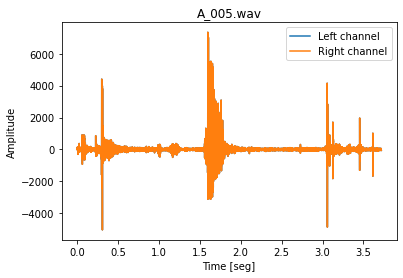

number of frames = 79576
number of channels = 2


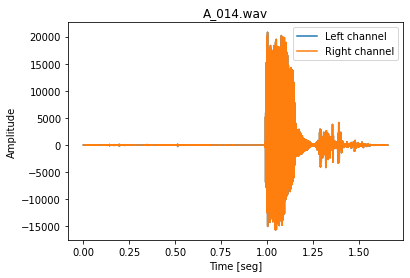

number of frames = 105496
number of channels = 1


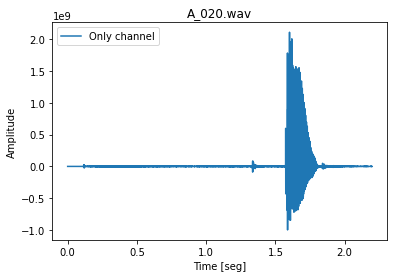

number of frames = 48856
number of channels = 2


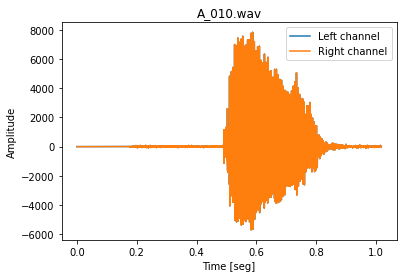

number of frames = 95896
number of channels = 2


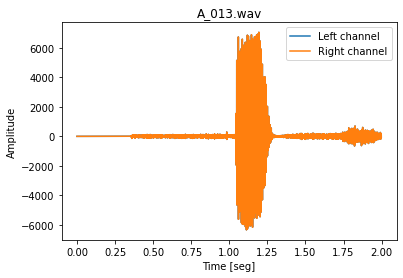

number of frames = 117016
number of channels = 1


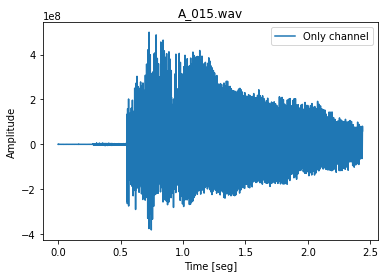

number of frames = 79576
number of channels = 1


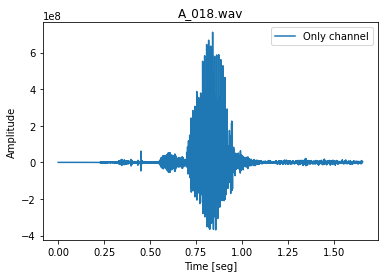

number of frames = 86936
number of channels = 2


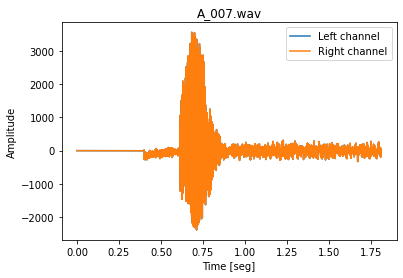

number of frames = 57496
number of channels = 2


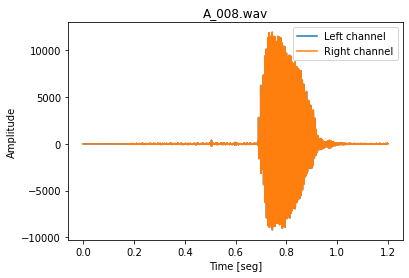

number of frames = 83416
number of channels = 1


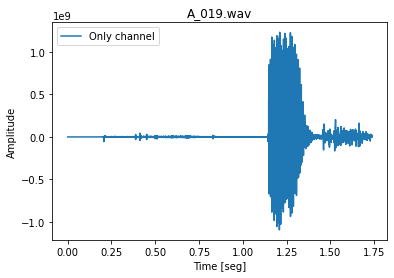

number of frames = 113176
number of channels = 1


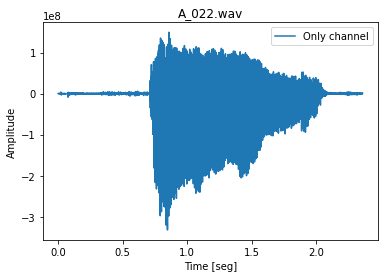

number of frames = 98776
number of channels = 1


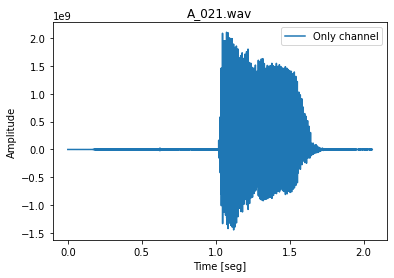

number of frames = 77656
number of channels = 1


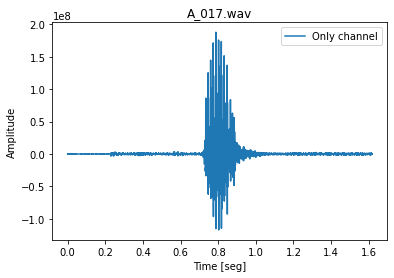

number of frames = 131416
number of channels = 2


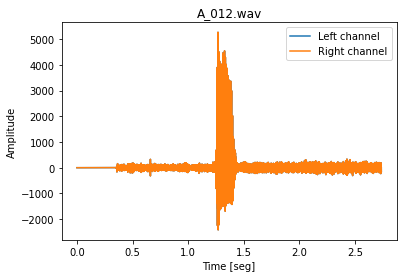

number of frames = 75736
number of channels = 2


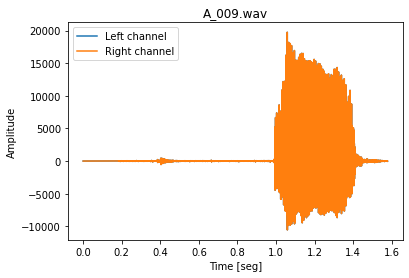

number of frames = 53656
number of channels = 2


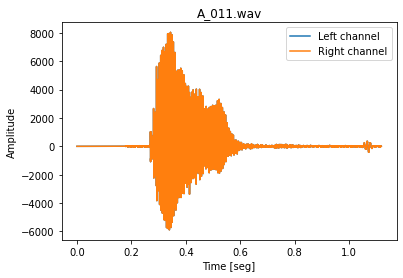

number of frames = 98082
number of channels = 2


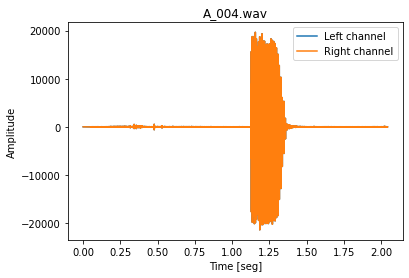

number of frames = 109128
number of channels = 1


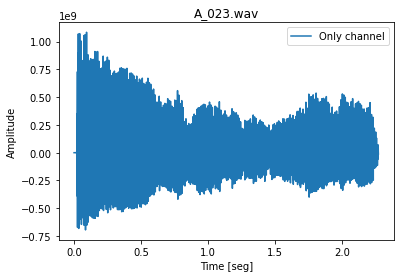

number of frames = 53661
number of channels = 1


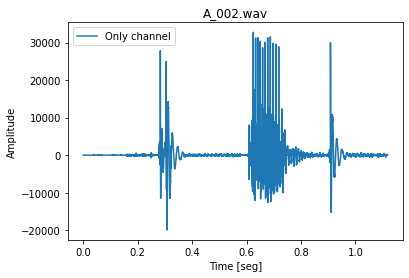

number of frames = 78020
number of channels = 2


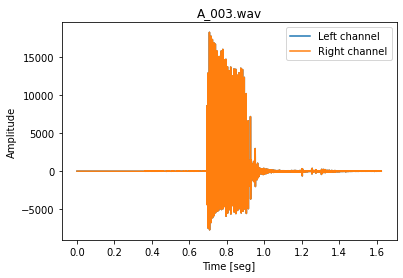

number of frames = 74676
number of channels = 2


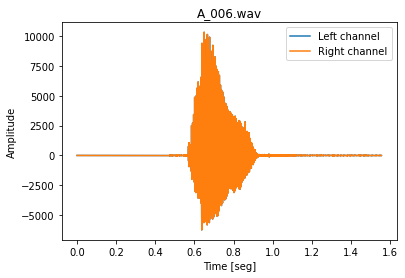

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


number of frames = 105375
number of channels = 2


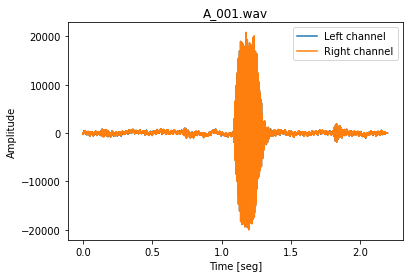

number of frames = 69016
number of channels = 1


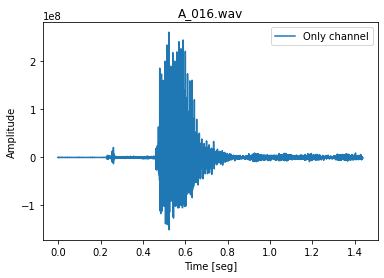

number of frames = 113176
number of channels = 1


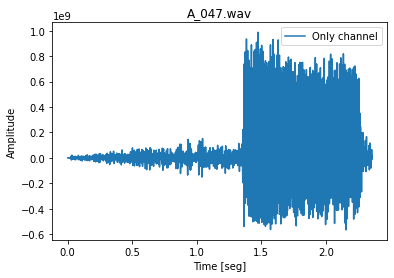

number of frames = 65928
number of channels = 1


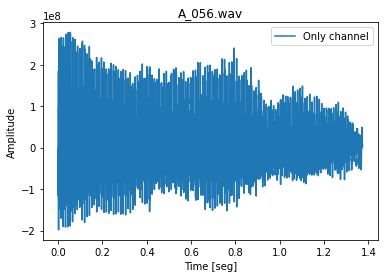

number of frames = 64216
number of channels = 1


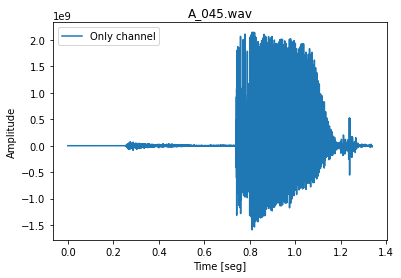

number of frames = 98568
number of channels = 1


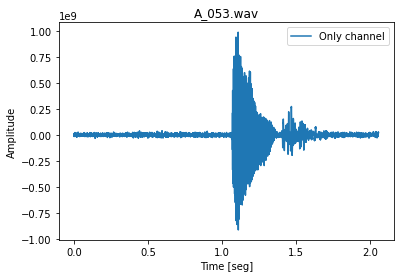

number of frames = 102446
number of channels = 1


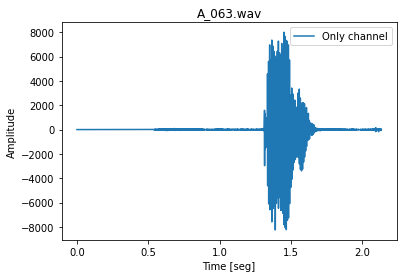

number of frames = 102616
number of channels = 1


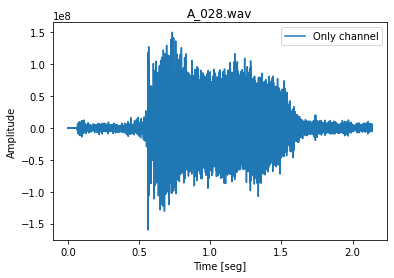

number of frames = 113176
number of channels = 1


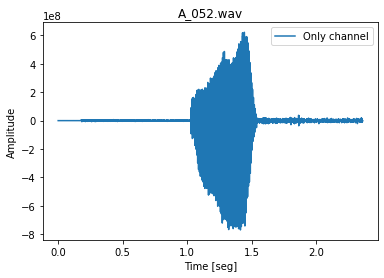

number of frames = 59416
number of channels = 1


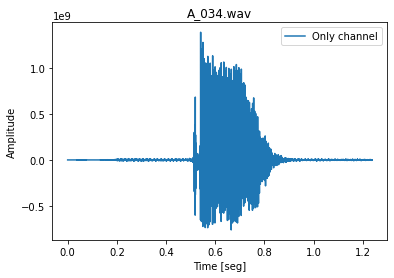

number of frames = 63048
number of channels = 1


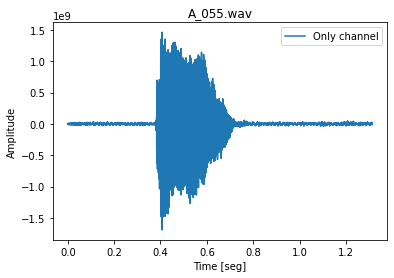

number of frames = 74568
number of channels = 1


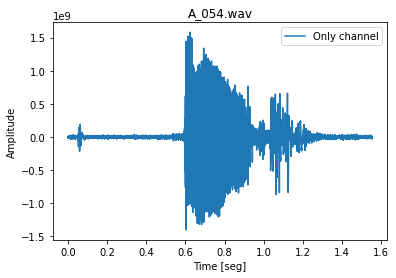

number of frames = 115096
number of channels = 1


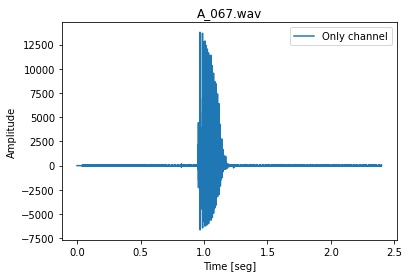

number of frames = 64216
number of channels = 1


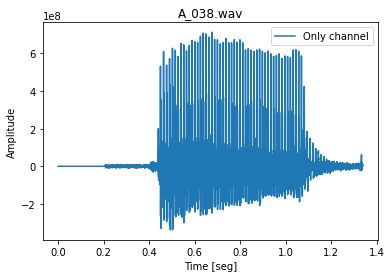

number of frames = 66888
number of channels = 1


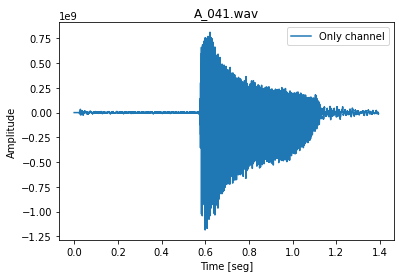

number of frames = 93016
number of channels = 1


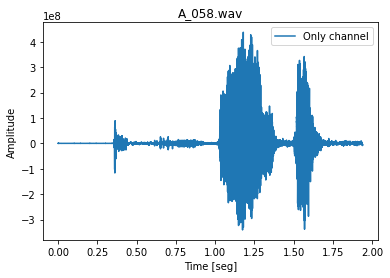

number of frames = 62296
number of channels = 1


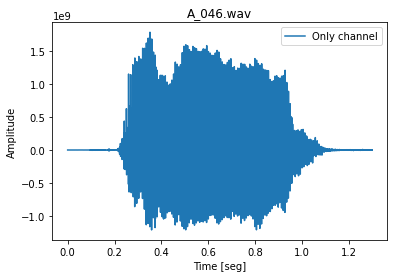

number of frames = 120648
number of channels = 1


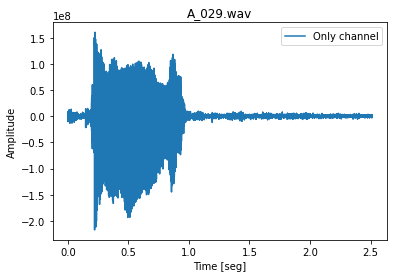

number of frames = 69768
number of channels = 1


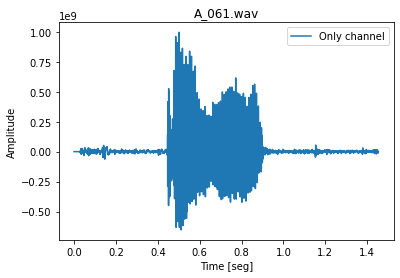

number of frames = 65176
number of channels = 1


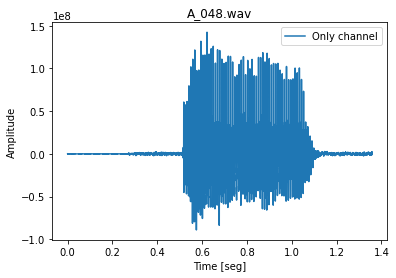

number of frames = 64216
number of channels = 1


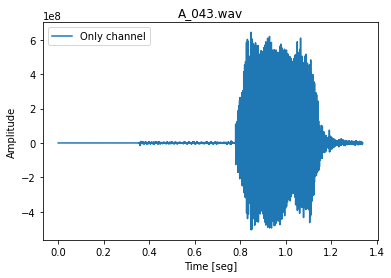

number of frames = 60376
number of channels = 1


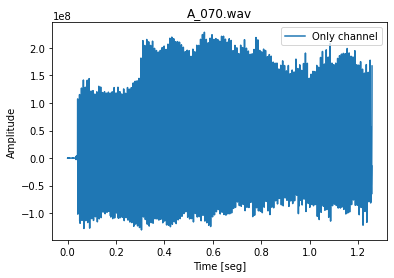

number of frames = 60376
number of channels = 1


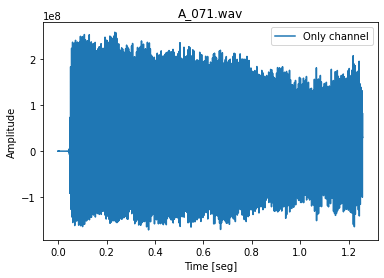

number of frames = 156168
number of channels = 1


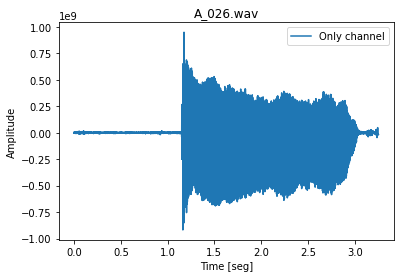

number of frames = 92808
number of channels = 1


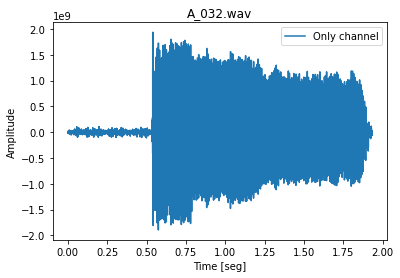

number of frames = 81496
number of channels = 1


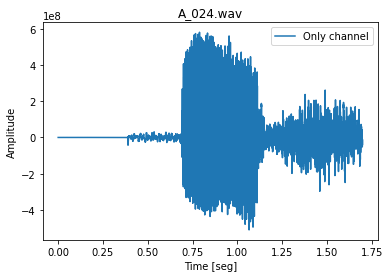

number of frames = 82456
number of channels = 1


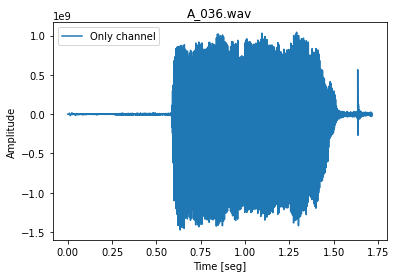

number of frames = 84376
number of channels = 1


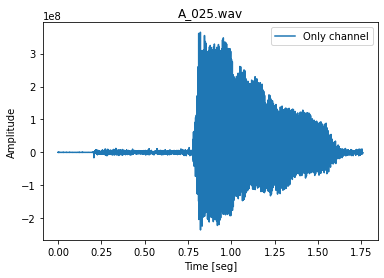

number of frames = 123528
number of channels = 1


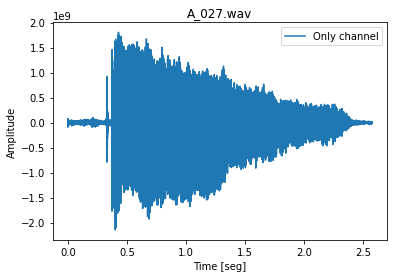

number of frames = 82456
number of channels = 1


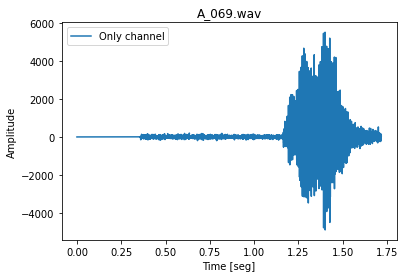

number of frames = 122776
number of channels = 1


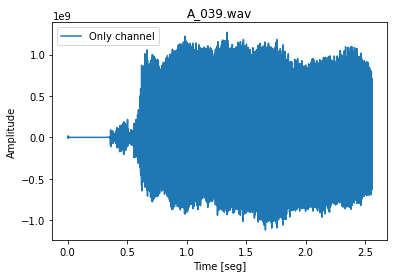

number of frames = 48856
number of channels = 1


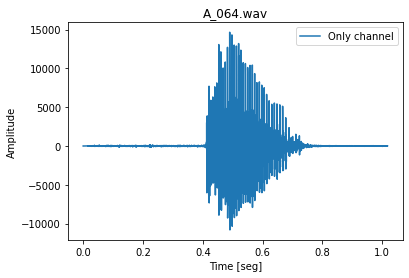

number of frames = 122776
number of channels = 1


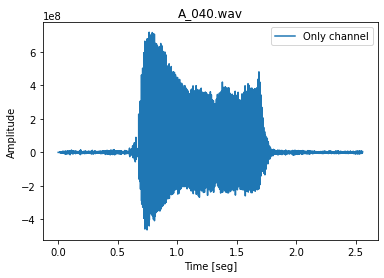

number of frames = 94936
number of channels = 1


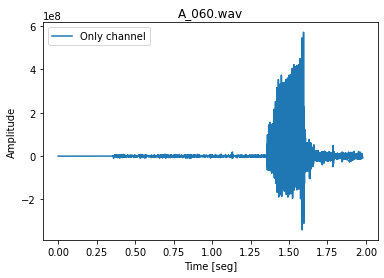

number of frames = 267840
number of channels = 1


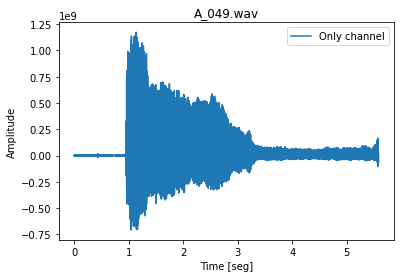

number of frames = 165016
number of channels = 1


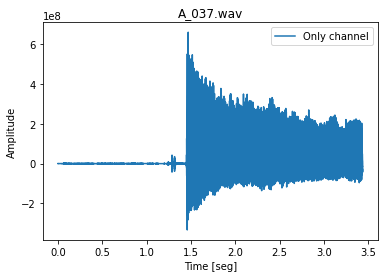

number of frames = 167896
number of channels = 1


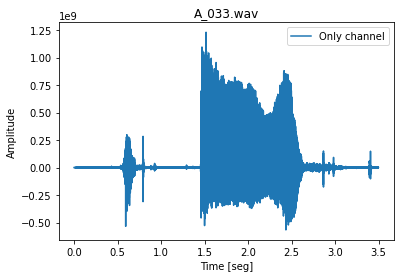

number of frames = 50776
number of channels = 1


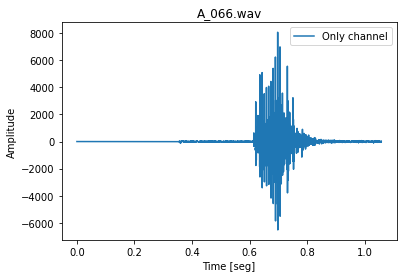

number of frames = 63256
number of channels = 1


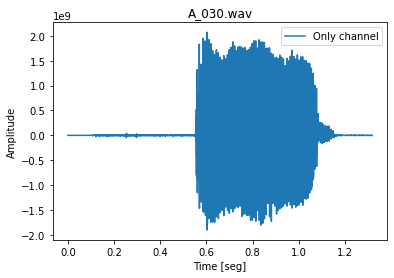

number of frames = 110296
number of channels = 1


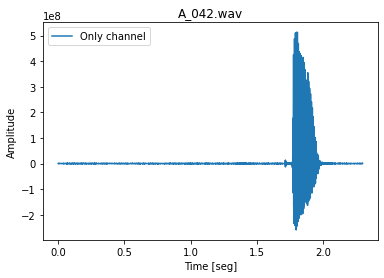

number of frames = 69976
number of channels = 1


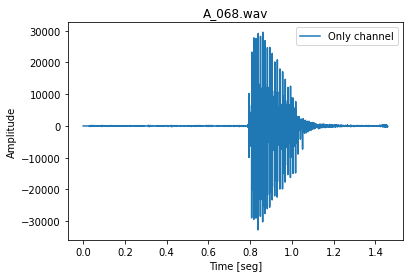

number of frames = 89928
number of channels = 1


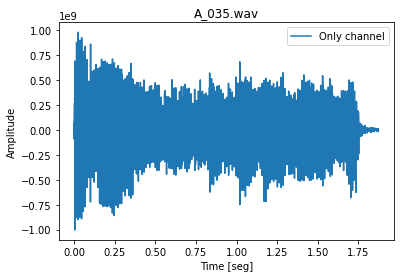

number of frames = 52488
number of channels = 1


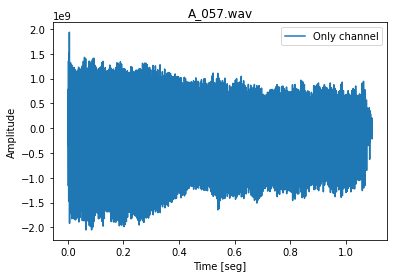

number of frames = 93016
number of channels = 1


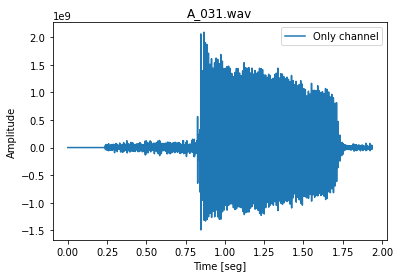

number of frames = 58456
number of channels = 1


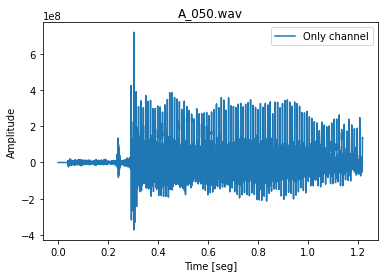

number of frames = 57496
number of channels = 1


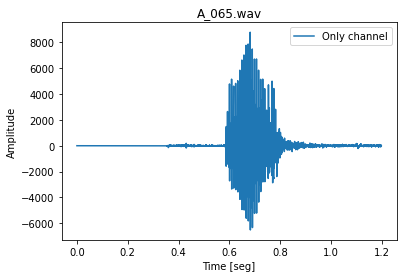

number of frames = 56536
number of channels = 1


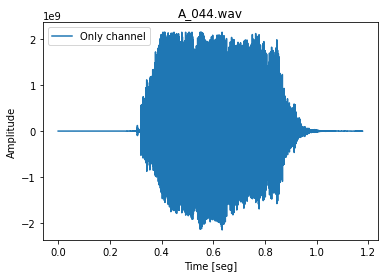

number of frames = 66888
number of channels = 1


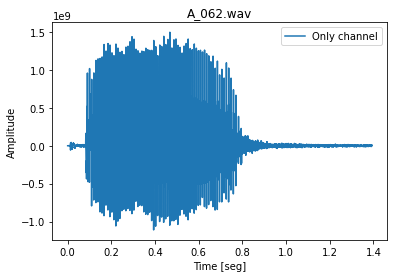

number of frames = 190728
number of channels = 1


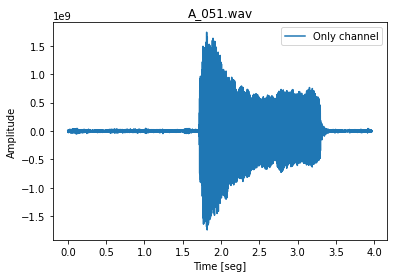

number of frames = 148696
number of channels = 1


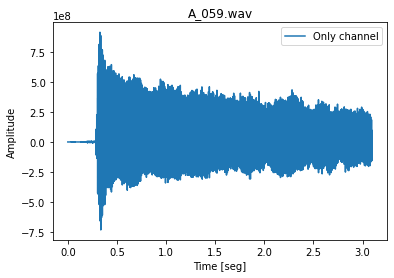

File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... no

In [105]:
for a in A_records:
    visualize_wav_info(path_A, a)

Visualizamos la información para las muestras de la clase **E**.

number of frames = 110296
number of channels = 1


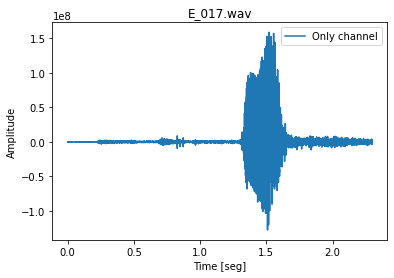

number of frames = 61336
number of channels = 2


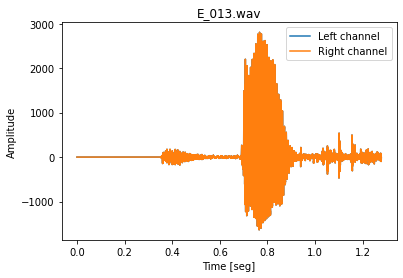

number of frames = 101425
number of channels = 2


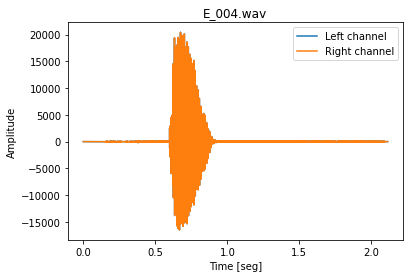

number of frames = 56536
number of channels = 2


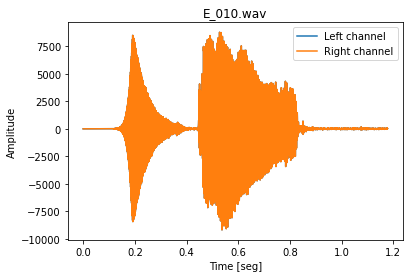

number of frames = 119896
number of channels = 1


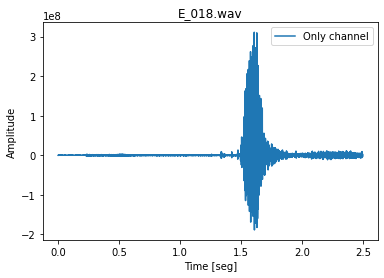

number of frames = 117976
number of channels = 1


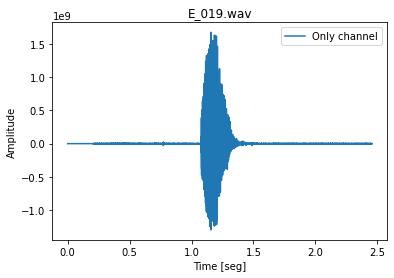

number of frames = 115101
number of channels = 1


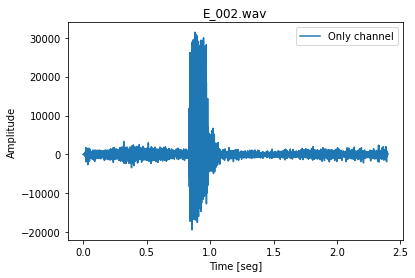

number of frames = 57496
number of channels = 2


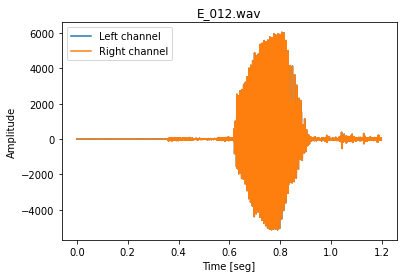

number of frames = 66136
number of channels = 2


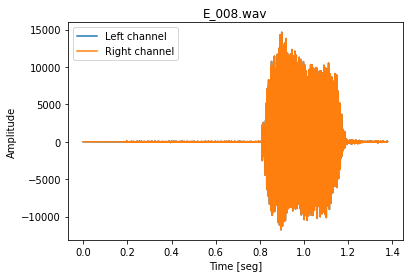

number of frames = 115096
number of channels = 1


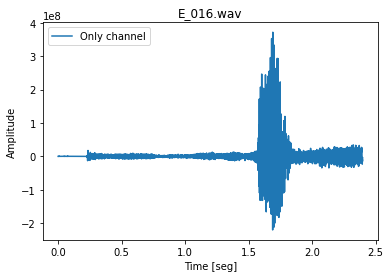

number of frames = 81363
number of channels = 2


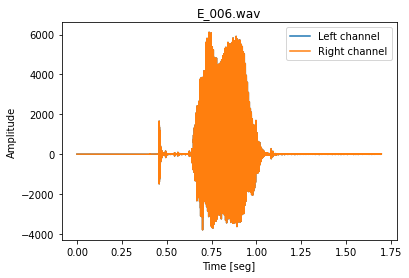

number of frames = 133336
number of channels = 2


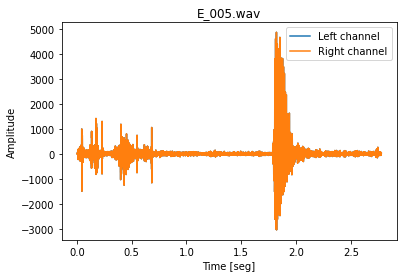

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


number of frames = 131072
number of channels = 2


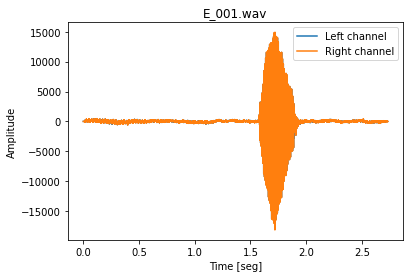

number of frames = 79576
number of channels = 2


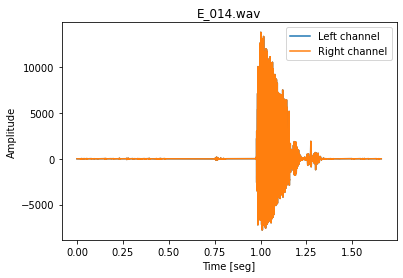

number of frames = 51736
number of channels = 2


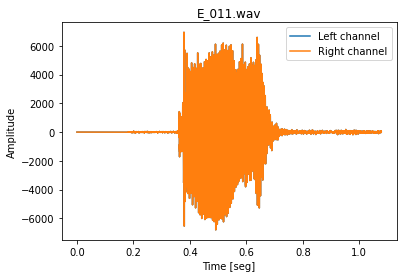

number of frames = 162136
number of channels = 1


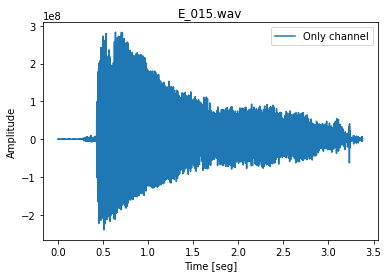

number of frames = 82478
number of channels = 2


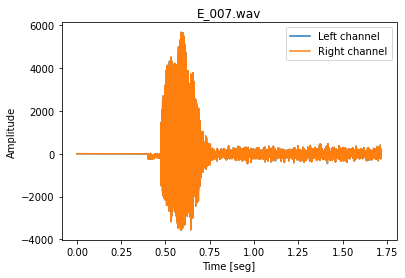

number of frames = 83416
number of channels = 1


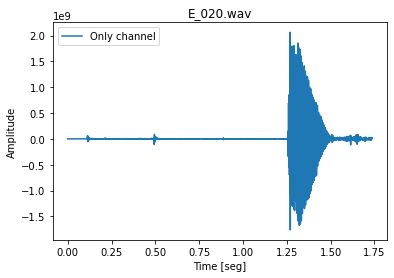

number of frames = 54616
number of channels = 2


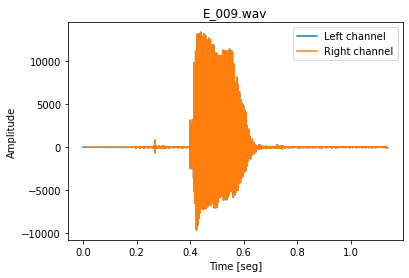

number of frames = 64968
number of channels = 1


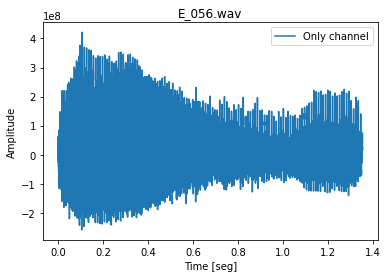

number of frames = 77448
number of channels = 1


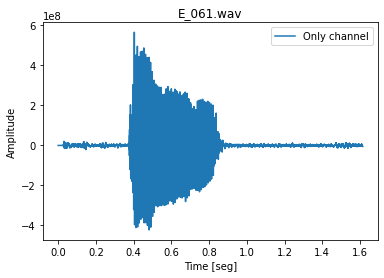

number of frames = 88216
number of channels = 1


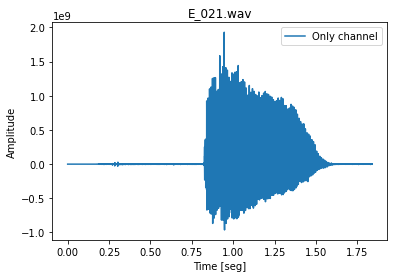

number of frames = 59416
number of channels = 1


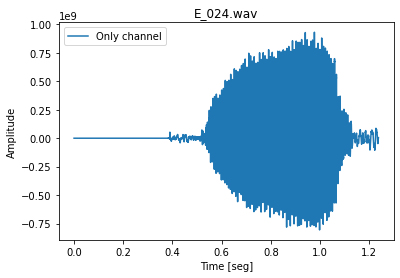

number of frames = 205128
number of channels = 1


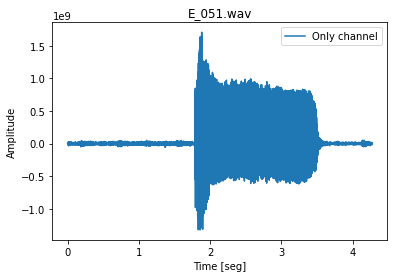

number of frames = 77656
number of channels = 1


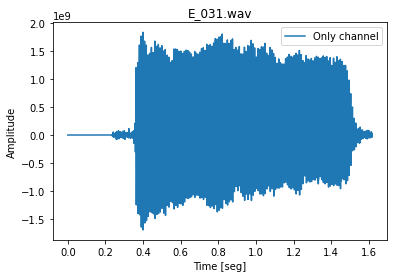

number of frames = 63256
number of channels = 1


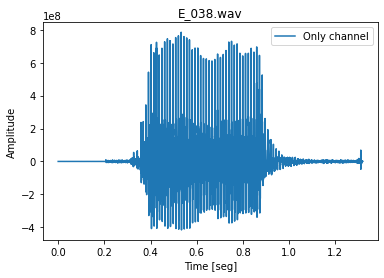

number of frames = 116056
number of channels = 1


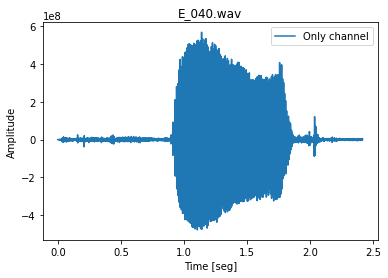

number of frames = 67096
number of channels = 1


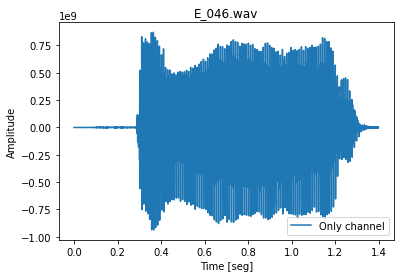

number of frames = 84376
number of channels = 1


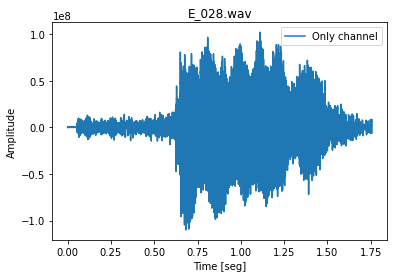

number of frames = 101656
number of channels = 1


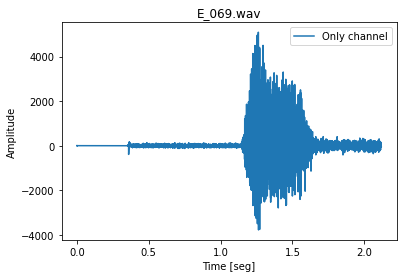

number of frames = 117016
number of channels = 1


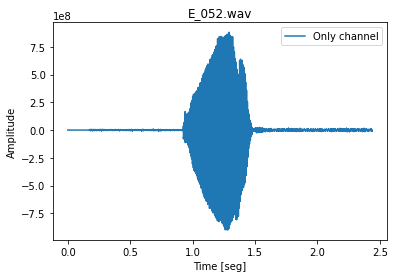

number of frames = 111048
number of channels = 1


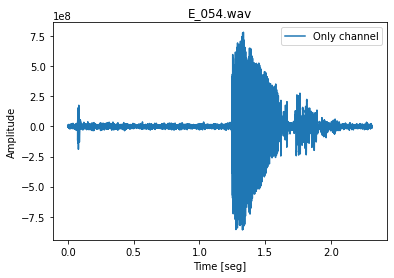

number of frames = 71688
number of channels = 1


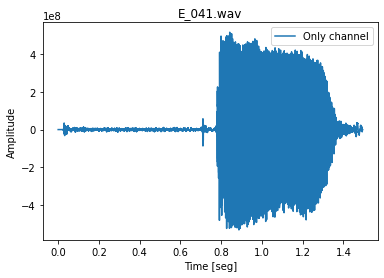

number of frames = 98776
number of channels = 1


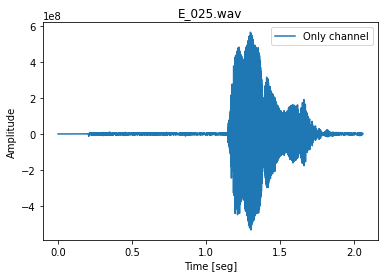

number of frames = 93016
number of channels = 1


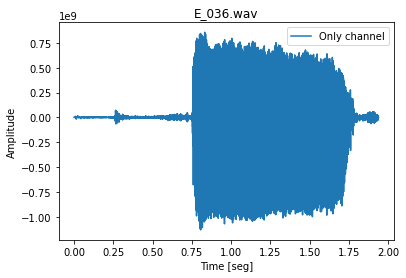

number of frames = 61336
number of channels = 1


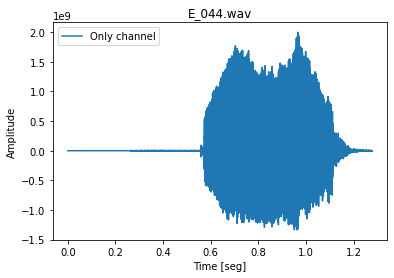

number of frames = 115096
number of channels = 1


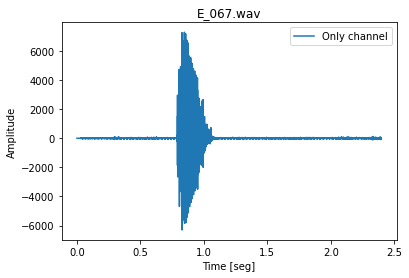

number of frames = 108168
number of channels = 1


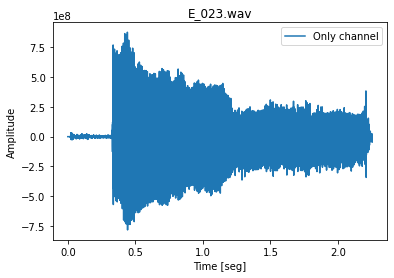

number of frames = 79368
number of channels = 1


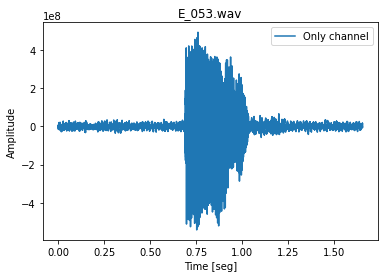

number of frames = 118728
number of channels = 1


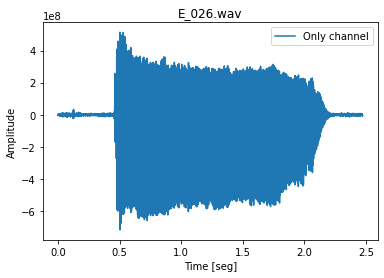

number of frames = 173656
number of channels = 1


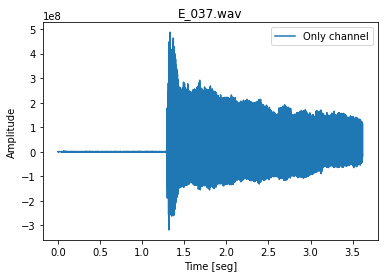

number of frames = 54408
number of channels = 1


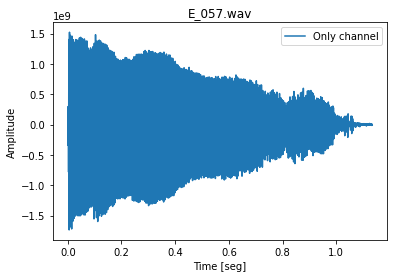

number of frames = 75528
number of channels = 1


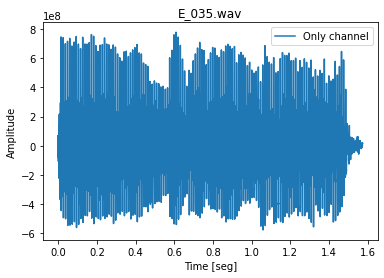

number of frames = 56536
number of channels = 1


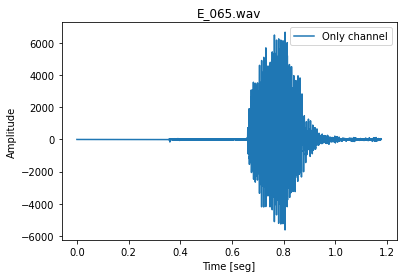

number of frames = 79368
number of channels = 1


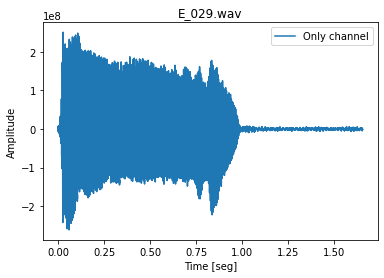

number of frames = 115096
number of channels = 1


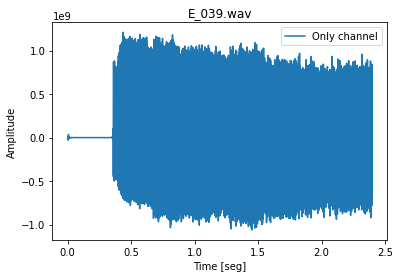

number of frames = 175576
number of channels = 1


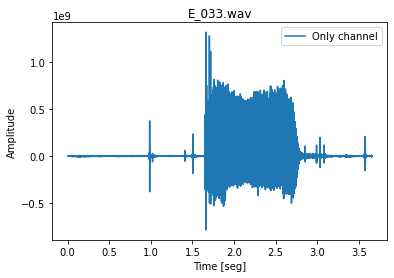

number of frames = 80536
number of channels = 1


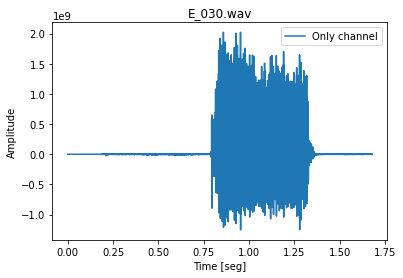

number of frames = 72856
number of channels = 1


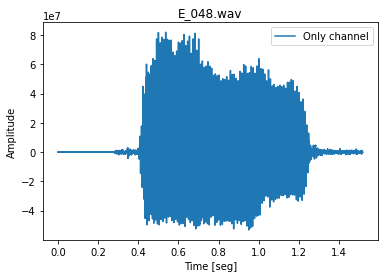

number of frames = 117976
number of channels = 1


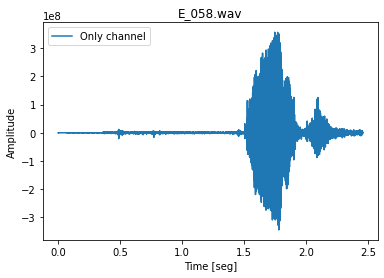

number of frames = 74776
number of channels = 1


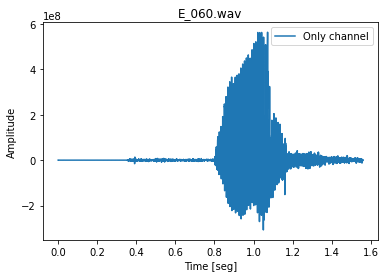

number of frames = 113176
number of channels = 1


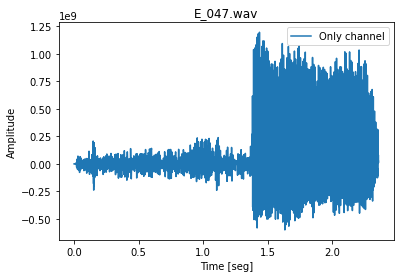

number of frames = 62640
number of channels = 1


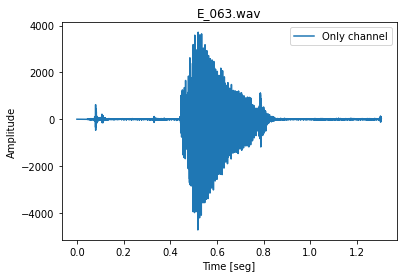

number of frames = 66136
number of channels = 1


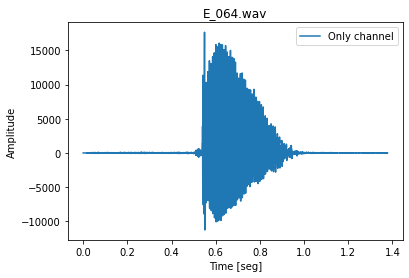

number of frames = 55576
number of channels = 1


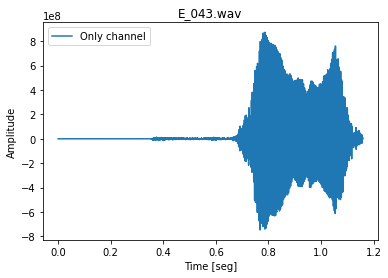

number of frames = 62088
number of channels = 1


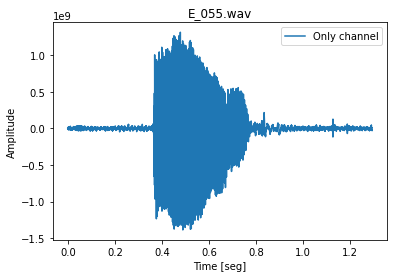

number of frames = 48856
number of channels = 1


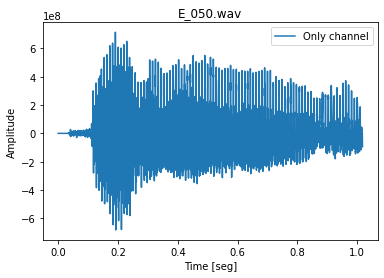

number of frames = 70728
number of channels = 1


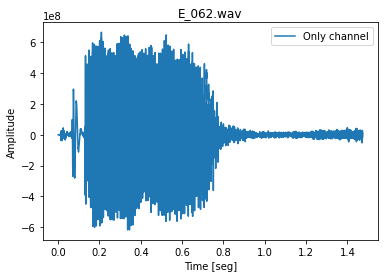

number of frames = 157336
number of channels = 1


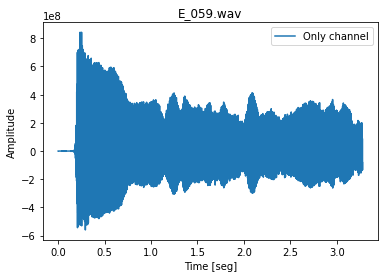

number of frames = 62296
number of channels = 1


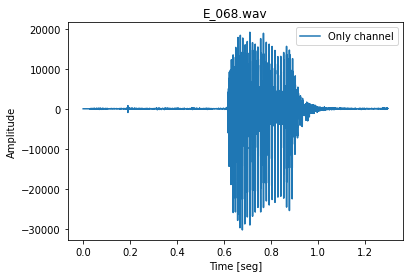

number of frames = 73816
number of channels = 1


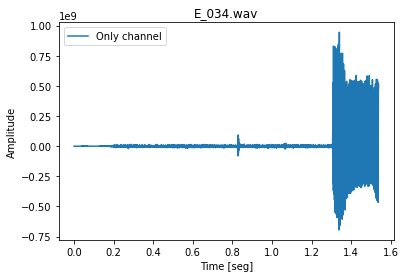

number of frames = 67096
number of channels = 1


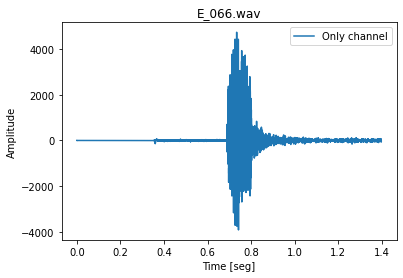

number of frames = 84168
number of channels = 1


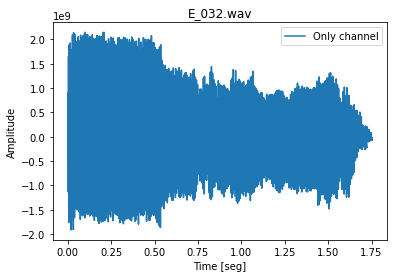

number of frames = 86296
number of channels = 1


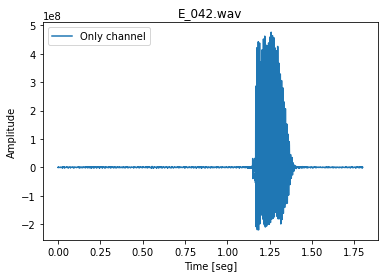

number of frames = 123528
number of channels = 1


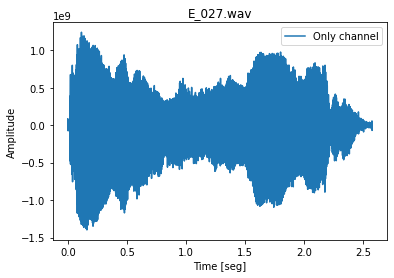

number of frames = 60376
number of channels = 1


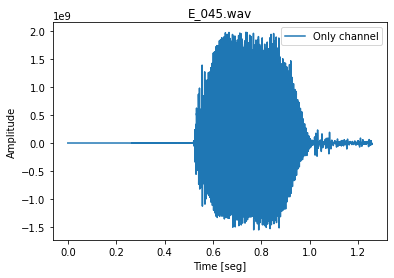

number of frames = 113176
number of channels = 1


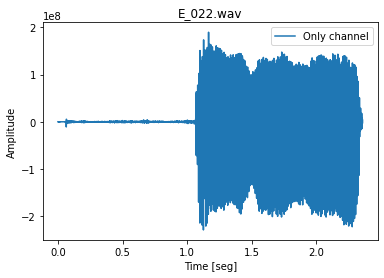

number of frames = 271680
number of channels = 1


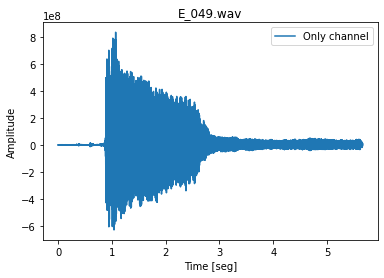

number of frames = 61336
number of channels = 1


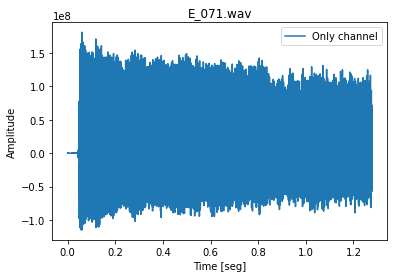

number of frames = 54616
number of channels = 1


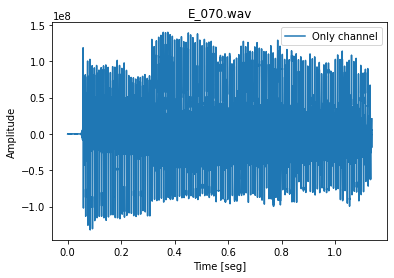

File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... no

In [106]:
for e in E_records:
    visualize_wav_info(path_E, e)

Visualizamos la información para las muestras de la clase **I**.

number of frames = 96856
number of channels = 1


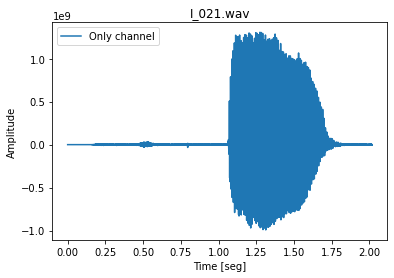

number of frames = 126408
number of channels = 1


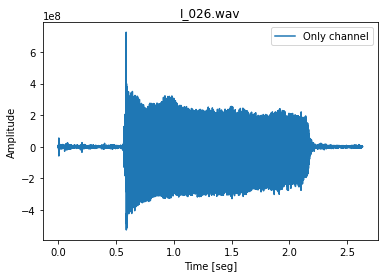

number of frames = 49816
number of channels = 1


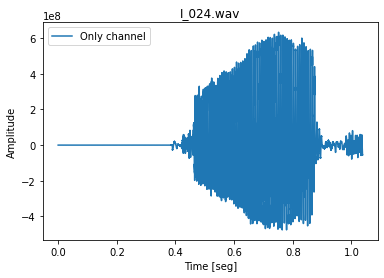

number of frames = 56536
number of channels = 2


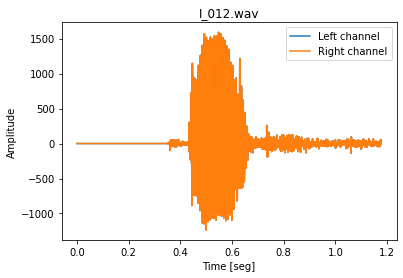

number of frames = 80536
number of channels = 1


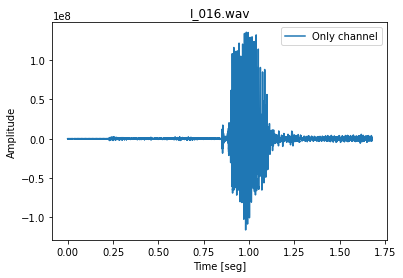

number of frames = 106456
number of channels = 1


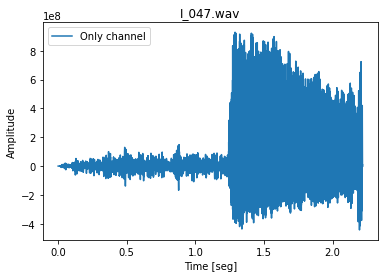

number of frames = 133128
number of channels = 1


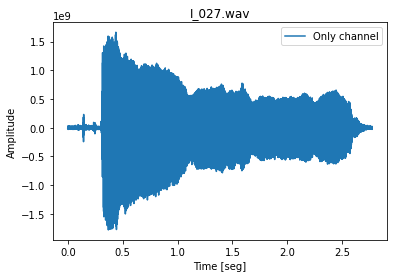

number of frames = 74776
number of channels = 1


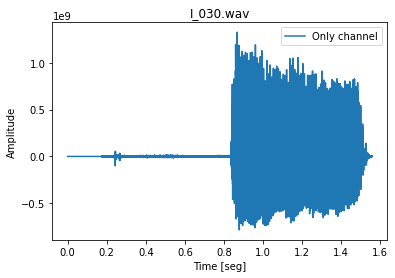

number of frames = 62296
number of channels = 1


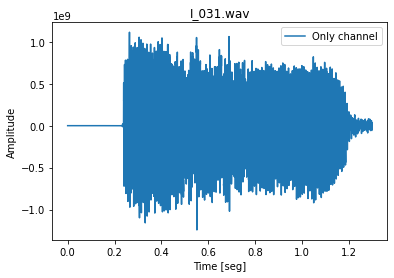

number of frames = 75736
number of channels = 1


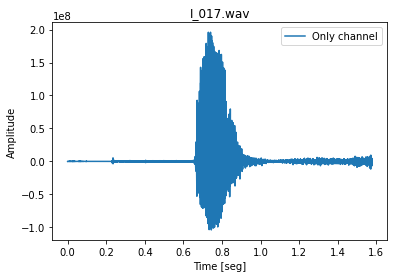

number of frames = 70936
number of channels = 2


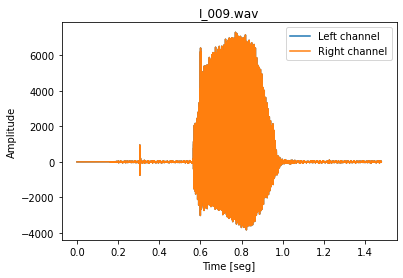

number of frames = 93976
number of channels = 1


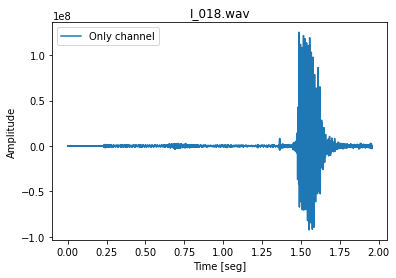

number of frames = 148696
number of channels = 1


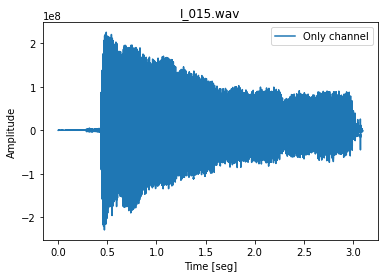

number of frames = 83416
number of channels = 1


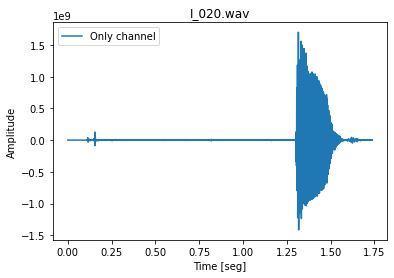

number of frames = 88221
number of channels = 1


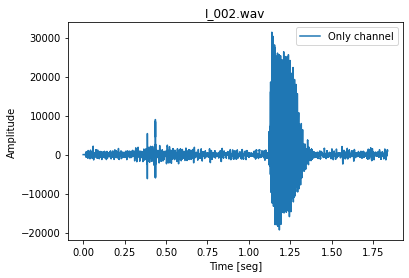

number of frames = 85128
number of channels = 1


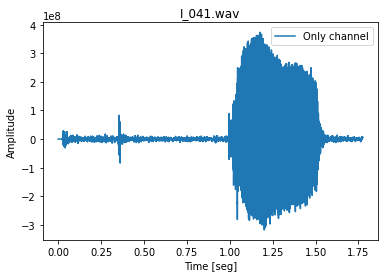

number of frames = 112216
number of channels = 1


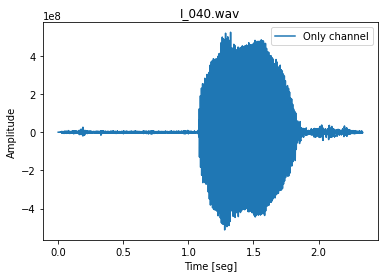

number of frames = 48856
number of channels = 1


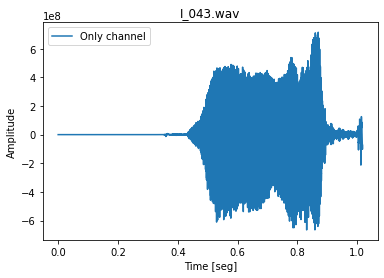

number of frames = 69976
number of channels = 1


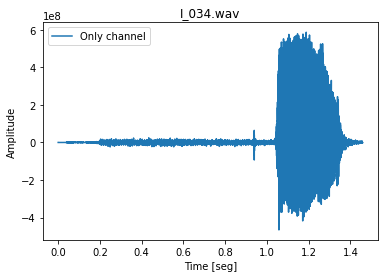

number of frames = 66136
number of channels = 1


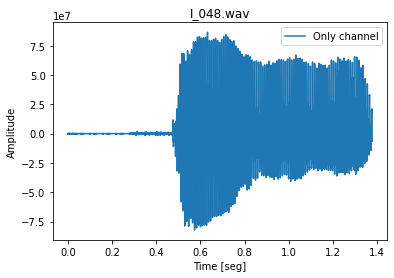

number of frames = 50776
number of channels = 2


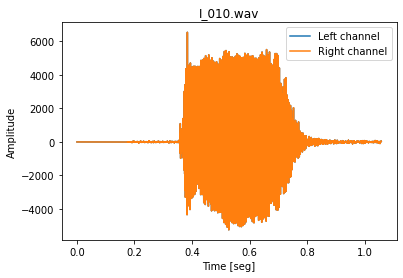

number of frames = 170776
number of channels = 1


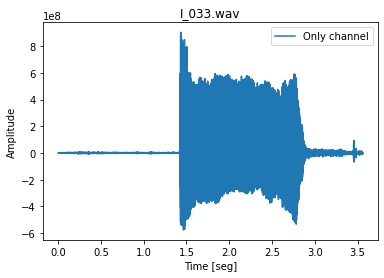

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


number of frames = 121856
number of channels = 2


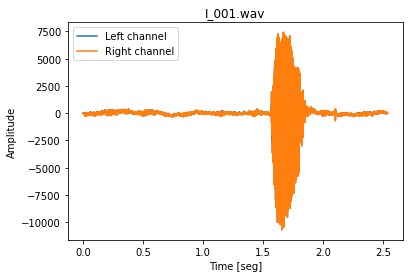

number of frames = 93016
number of channels = 1


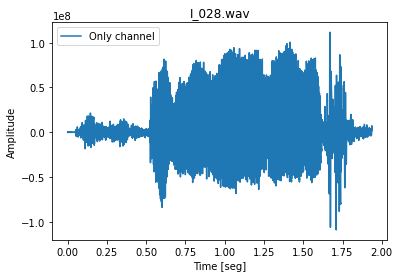

number of frames = 57496
number of channels = 1


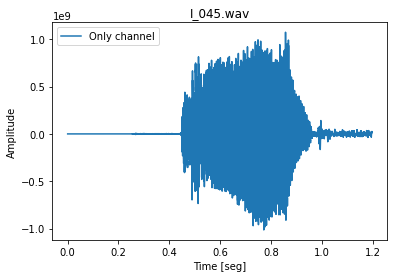

number of frames = 90888
number of channels = 1


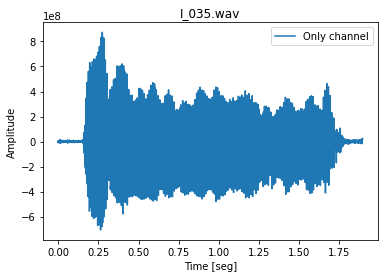

number of frames = 132376
number of channels = 2


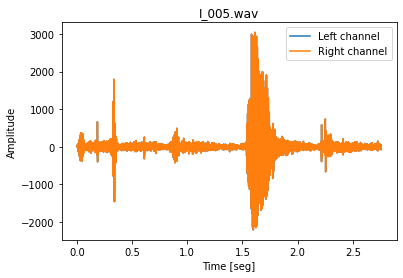

number of frames = 49816
number of channels = 1


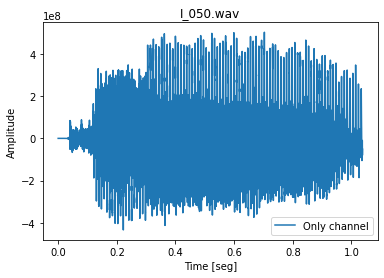

number of frames = 71896
number of channels = 1


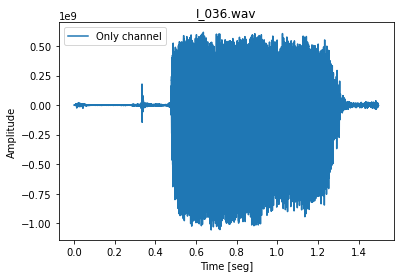

number of frames = 64216
number of channels = 1


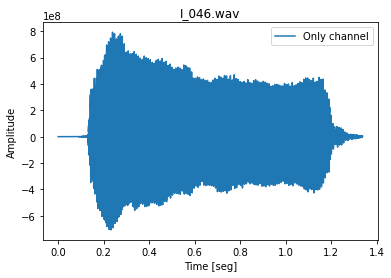

number of frames = 90136
number of channels = 1


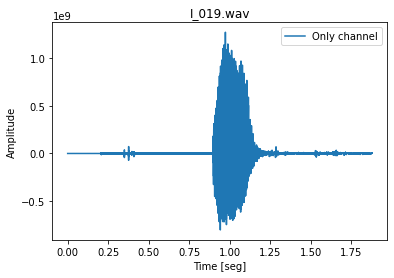

number of frames = 90280
number of channels = 2


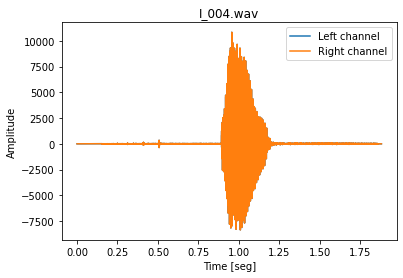

number of frames = 116056
number of channels = 1


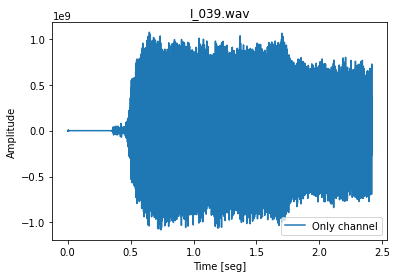

number of frames = 85336
number of channels = 2


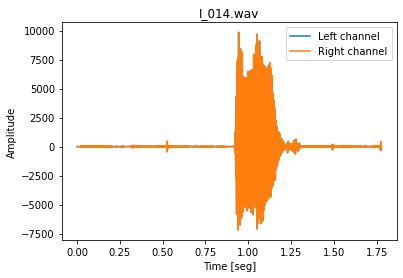

number of frames = 43096
number of channels = 1


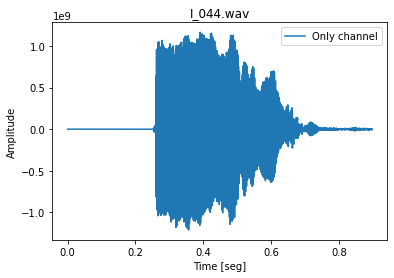

number of frames = 50776
number of channels = 1


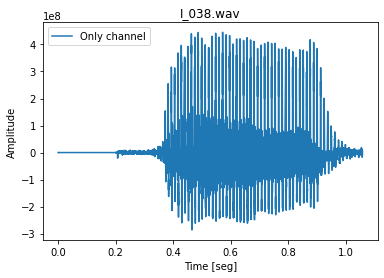

number of frames = 69016
number of channels = 2


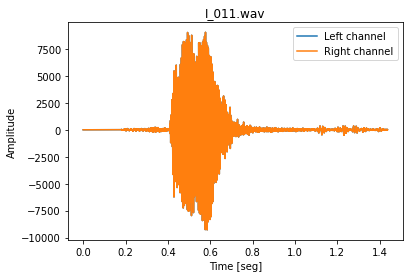

number of frames = 96648
number of channels = 1


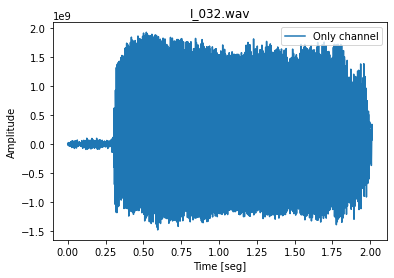

number of frames = 86296
number of channels = 2


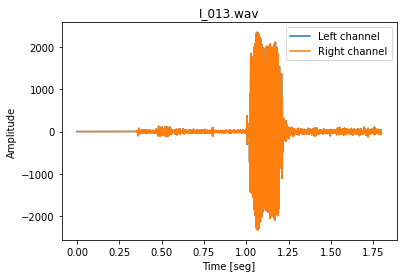

number of frames = 97816
number of channels = 1


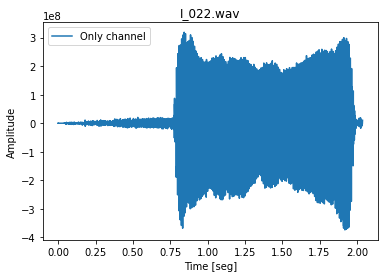

number of frames = 83416
number of channels = 1


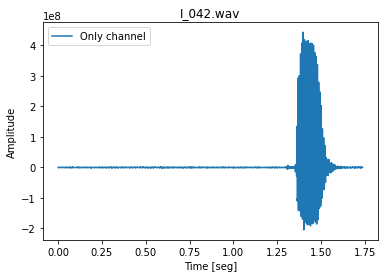

number of frames = 54616
number of channels = 2


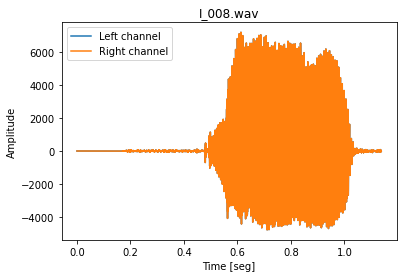

number of frames = 162136
number of channels = 1


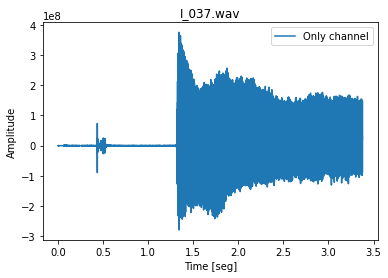

number of frames = 88968
number of channels = 1


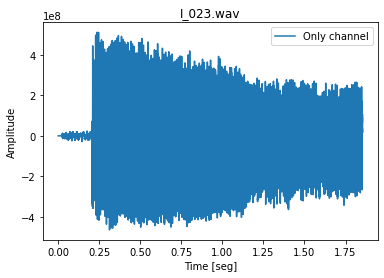

number of frames = 103654
number of channels = 2


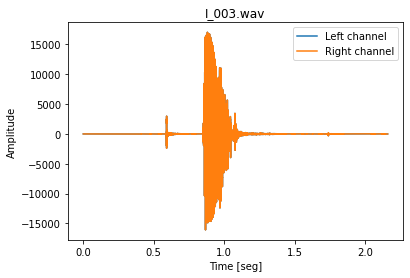

number of frames = 63048
number of channels = 1


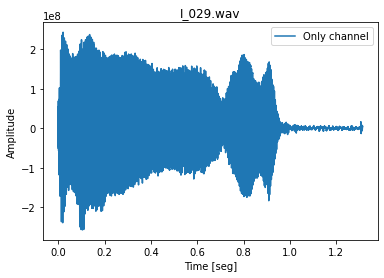

number of frames = 74676
number of channels = 2


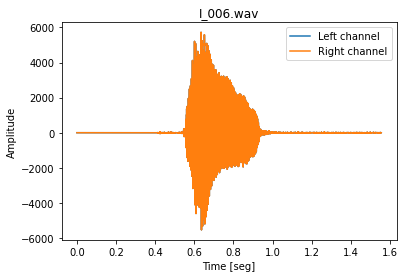

number of frames = 83416
number of channels = 1


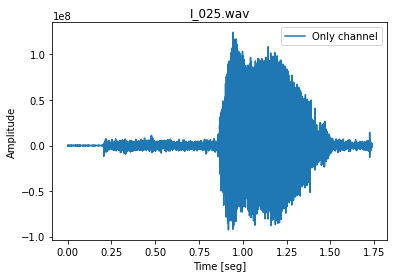

number of frames = 92509
number of channels = 2


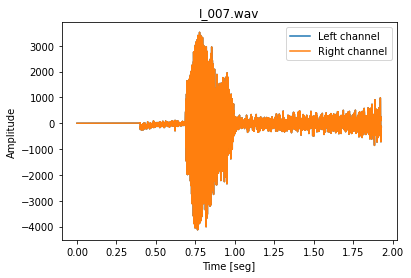

number of frames = 113176
number of channels = 1


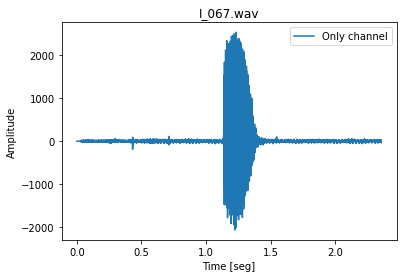

number of frames = 66888
number of channels = 1


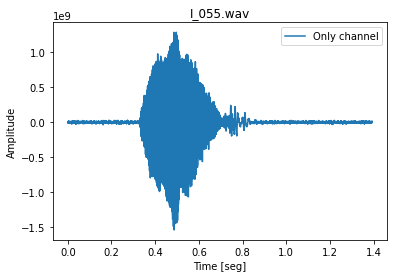

number of frames = 93768
number of channels = 1


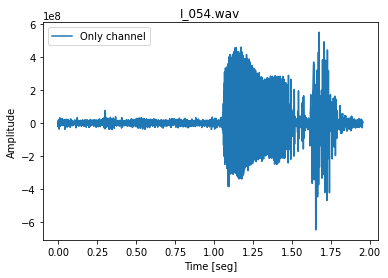

number of frames = 97816
number of channels = 1


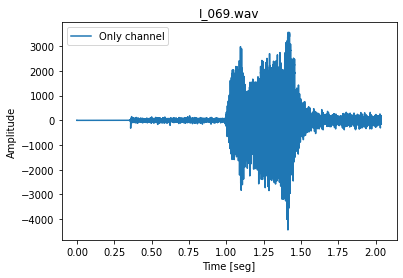

number of frames = 147736
number of channels = 1


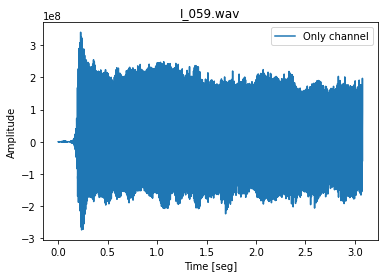

number of frames = 57496
number of channels = 1


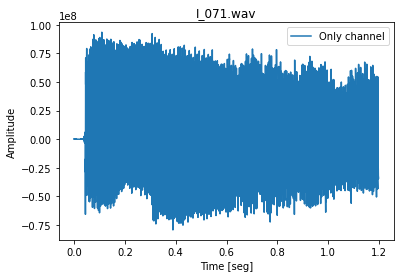

number of frames = 65726
number of channels = 1


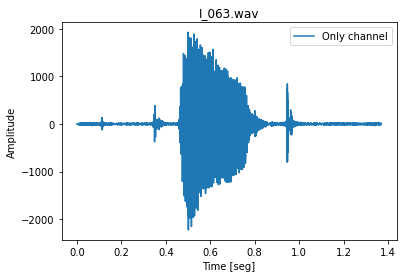

number of frames = 113176
number of channels = 1


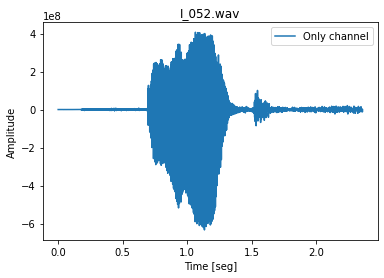

number of frames = 71896
number of channels = 1


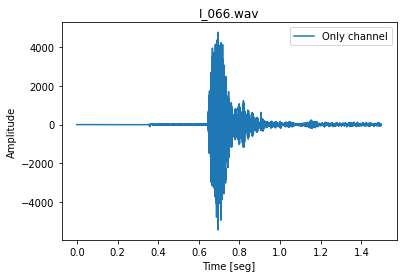

number of frames = 64008
number of channels = 1


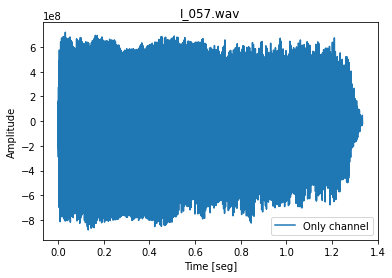

number of frames = 80328
number of channels = 1


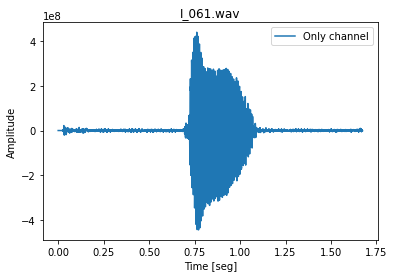

number of frames = 53656
number of channels = 1


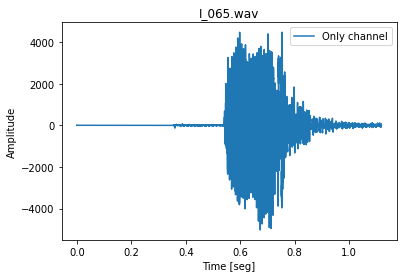

number of frames = 94936
number of channels = 1


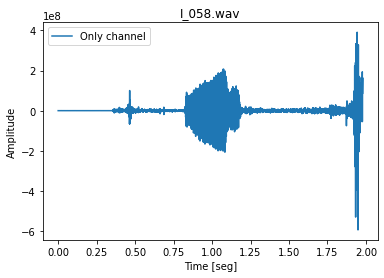

number of frames = 54408
number of channels = 1


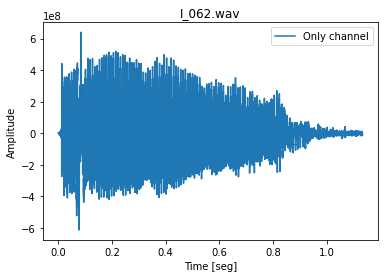

number of frames = 64008
number of channels = 1


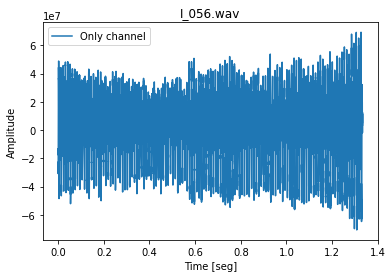

number of frames = 70936
number of channels = 1


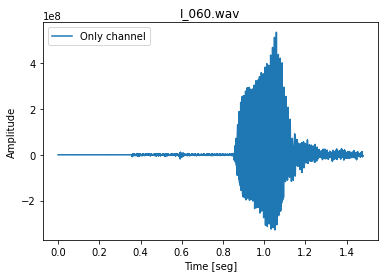

number of frames = 65176
number of channels = 1


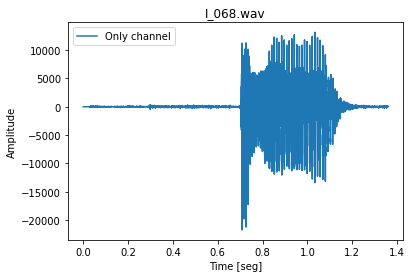

number of frames = 85128
number of channels = 1


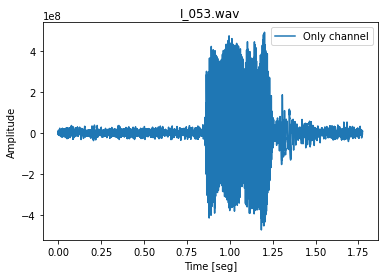

number of frames = 62296
number of channels = 1


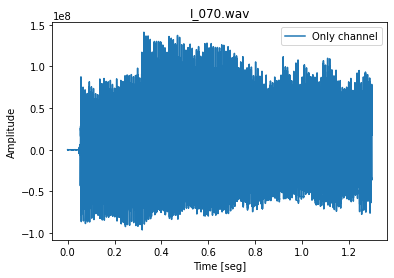

number of frames = 152328
number of channels = 1


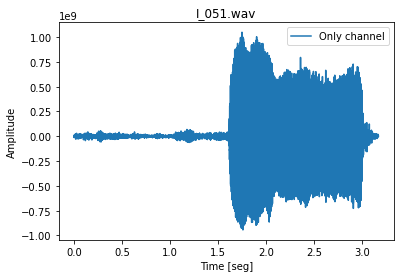

number of frames = 69976
number of channels = 1


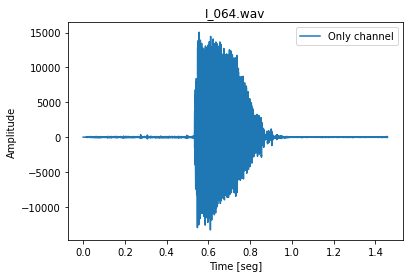

File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... no

In [107]:
for i in I_records:
    visualize_wav_info(path_I, i)

Visualizamos la información para las muestras de la clase **O**.

number of frames = 76696
number of channels = 1


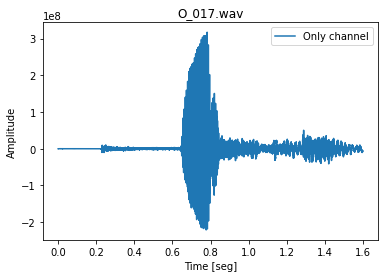

number of frames = 55728
number of channels = 2


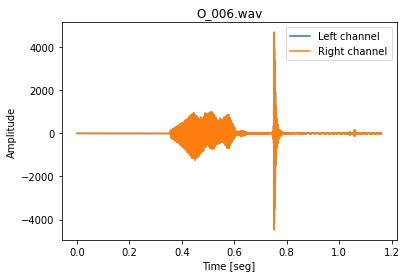

number of frames = 99736
number of channels = 1


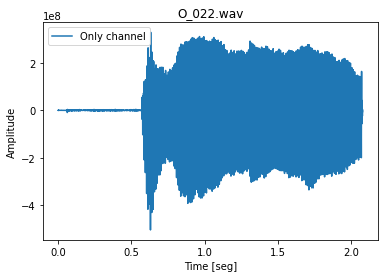

number of frames = 59416
number of channels = 2


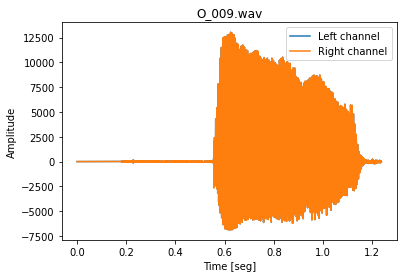

number of frames = 83416
number of channels = 1


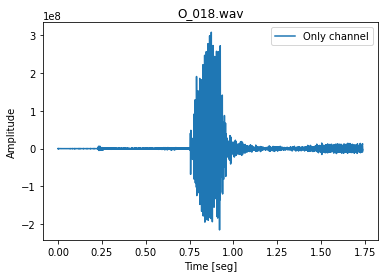

number of frames = 70941
number of channels = 1


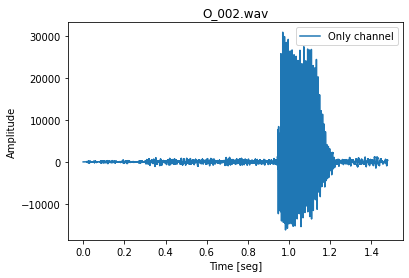

number of frames = 90888
number of channels = 1


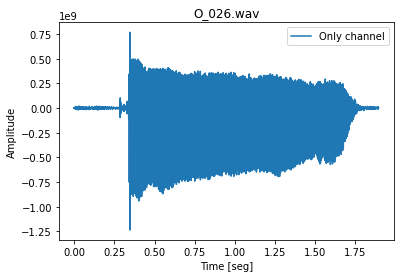

number of frames = 74568
number of channels = 1


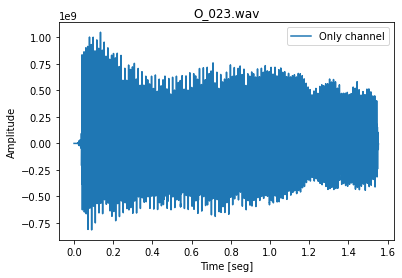

number of frames = 79134
number of channels = 2


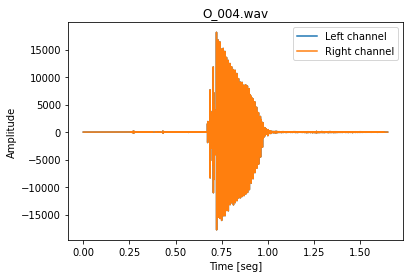

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


number of frames = 115712
number of channels = 2


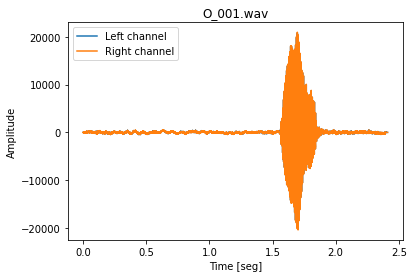

number of frames = 86296
number of channels = 2


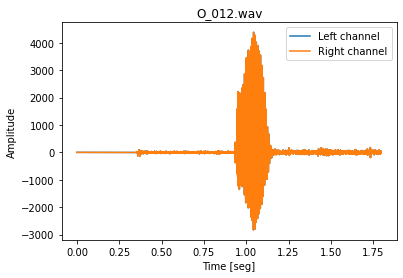

number of frames = 133128
number of channels = 1


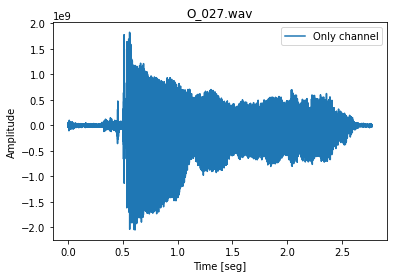

number of frames = 85336
number of channels = 1


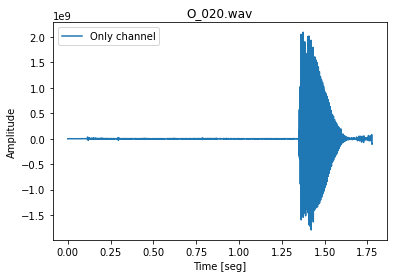

number of frames = 49816
number of channels = 2


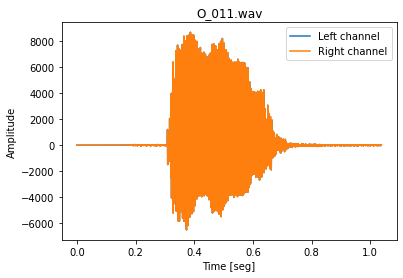

number of frames = 96856
number of channels = 1


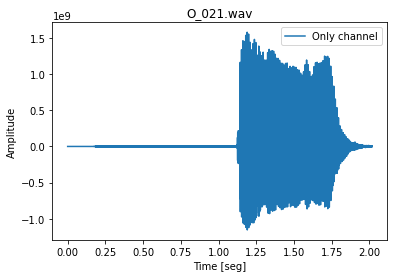

number of frames = 151576
number of channels = 1


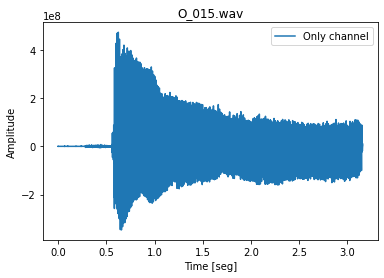

number of frames = 56536
number of channels = 2


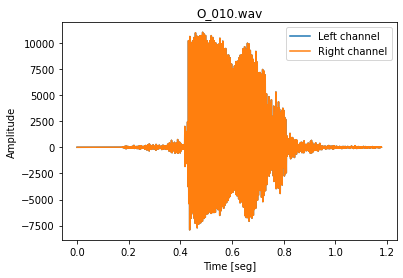

number of frames = 108113
number of channels = 2


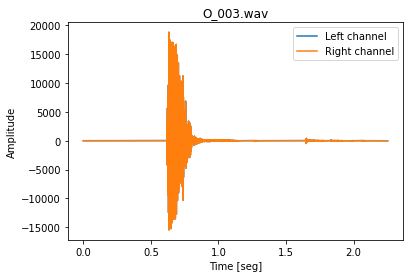

number of frames = 124696
number of channels = 2


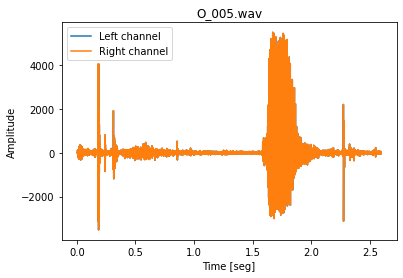

number of frames = 93016
number of channels = 1


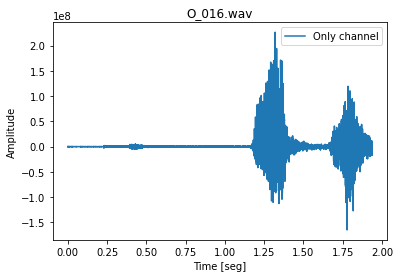

number of frames = 105883
number of channels = 2


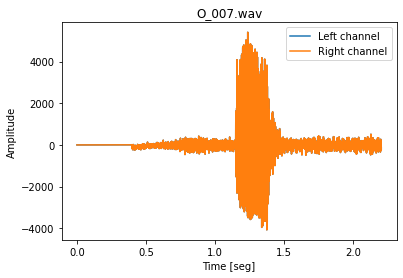

number of frames = 85336
number of channels = 1


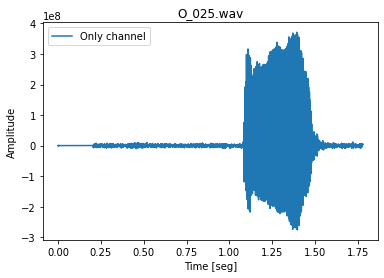

number of frames = 66136
number of channels = 2


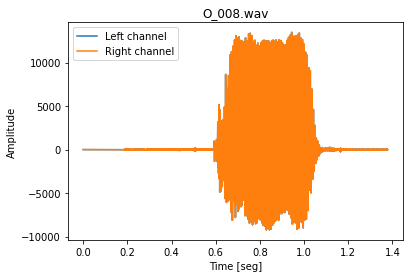

number of frames = 54616
number of channels = 1


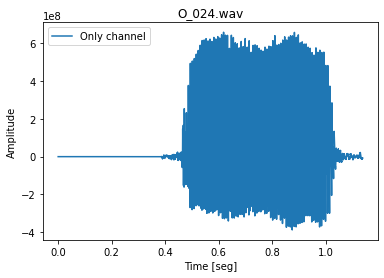

number of frames = 86296
number of channels = 1


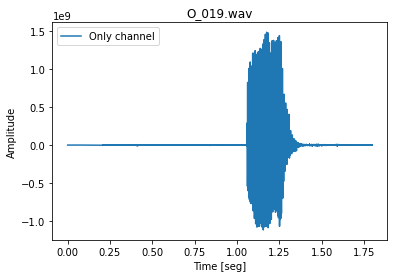

number of frames = 57496
number of channels = 2


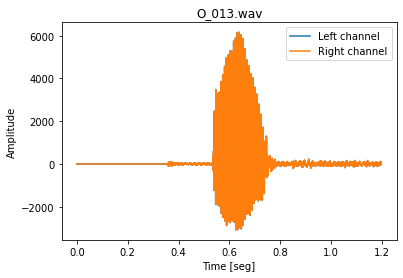

number of frames = 73816
number of channels = 1


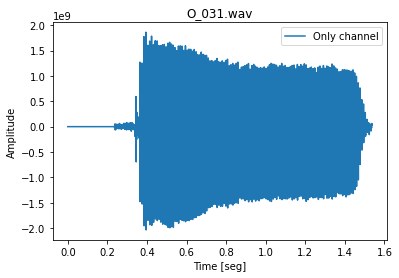

number of frames = 124696
number of channels = 1


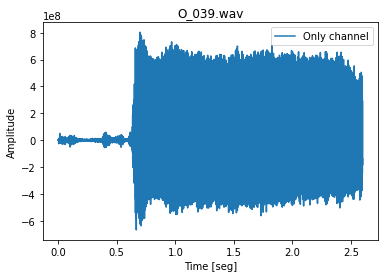

number of frames = 52696
number of channels = 1


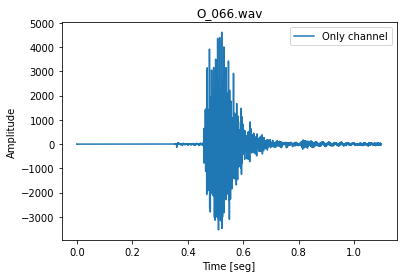

number of frames = 83208
number of channels = 1


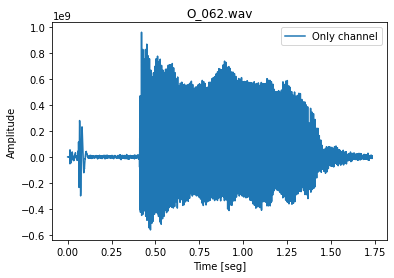

number of frames = 118936
number of channels = 1


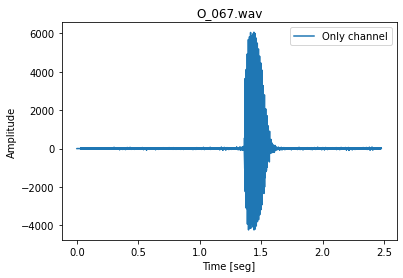

number of frames = 65928
number of channels = 1


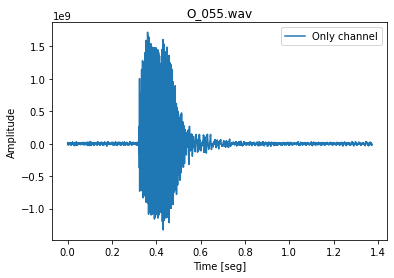

number of frames = 62296
number of channels = 1


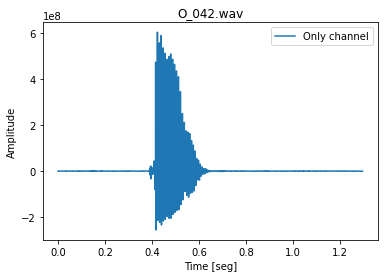

number of frames = 68056
number of channels = 1


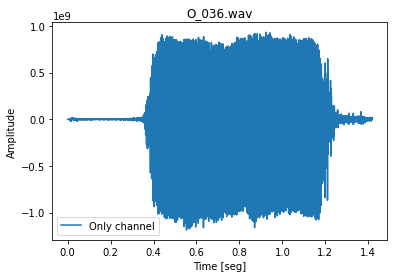

number of frames = 45016
number of channels = 1


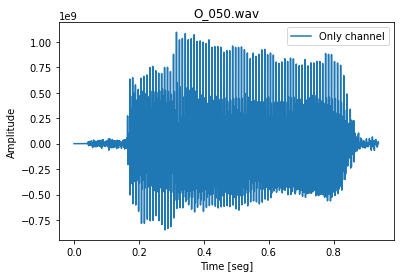

number of frames = 276480
number of channels = 1


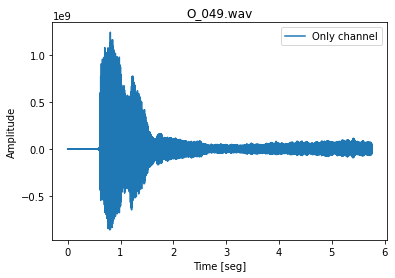

number of frames = 64216
number of channels = 1


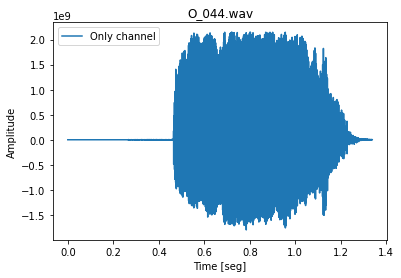

number of frames = 46936
number of channels = 1


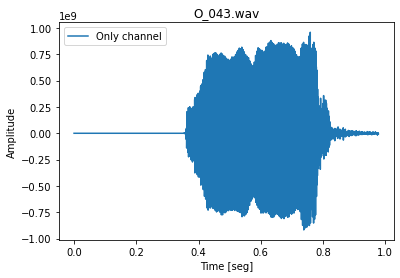

number of frames = 50914
number of channels = 1


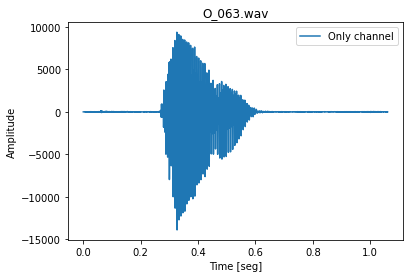

number of frames = 119896
number of channels = 1


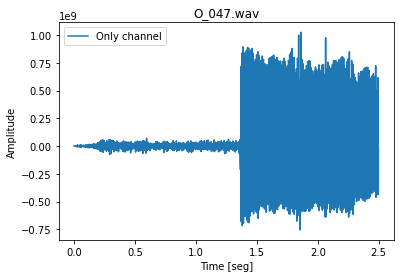

number of frames = 60168
number of channels = 1


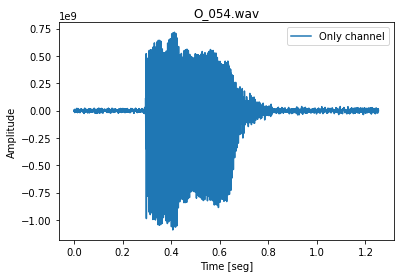

number of frames = 65176
number of channels = 1


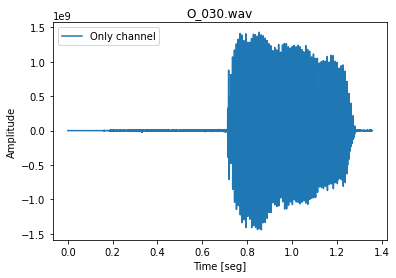

number of frames = 153496
number of channels = 1


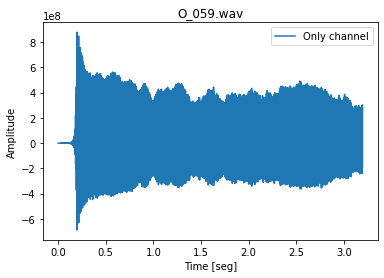

number of frames = 78408
number of channels = 1


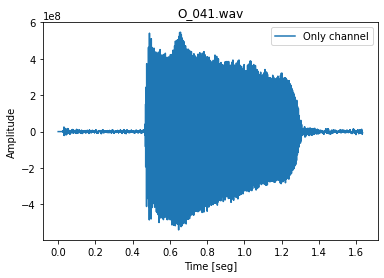

number of frames = 49816
number of channels = 1


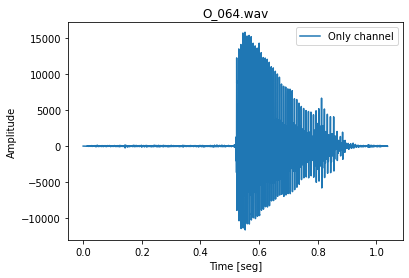

number of frames = 64008
number of channels = 1


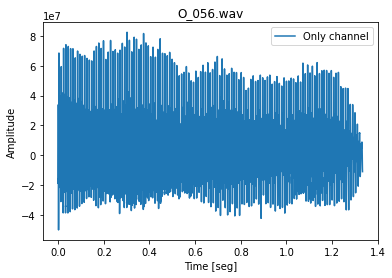

number of frames = 107416
number of channels = 1


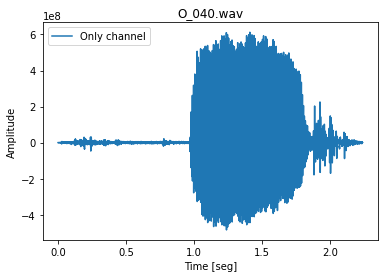

number of frames = 71688
number of channels = 1


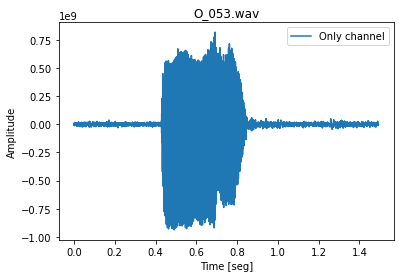

number of frames = 74776
number of channels = 1


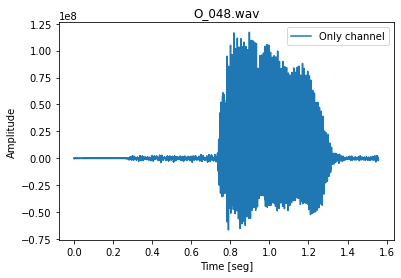

number of frames = 72856
number of channels = 1


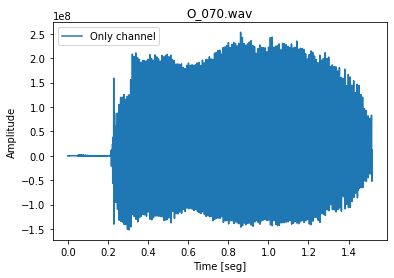

number of frames = 60376
number of channels = 1


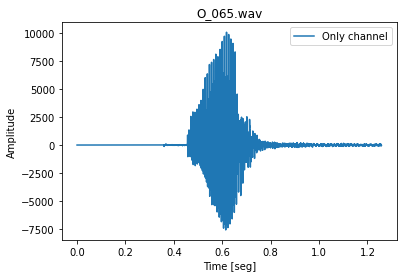

number of frames = 98568
number of channels = 1


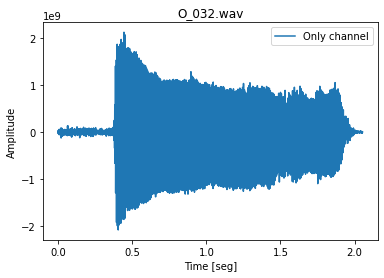

number of frames = 74776
number of channels = 1


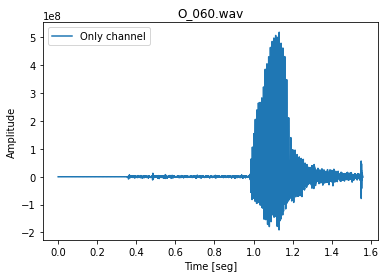

number of frames = 80536
number of channels = 1


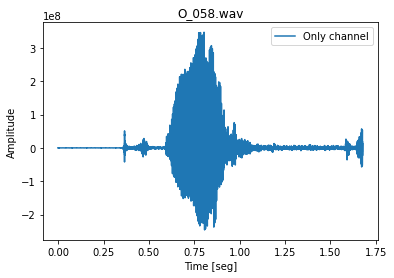

number of frames = 88008
number of channels = 1


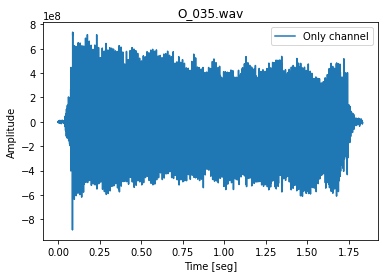

number of frames = 117976
number of channels = 1


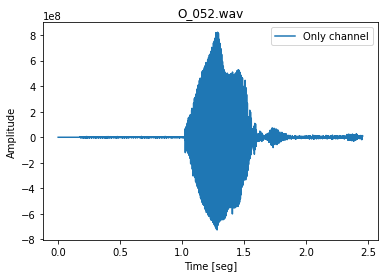

number of frames = 67096
number of channels = 1


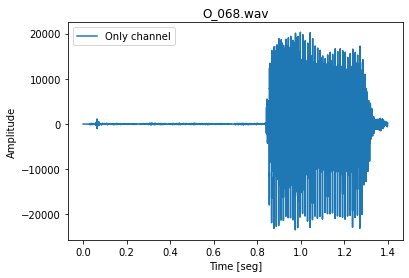

number of frames = 51736
number of channels = 1


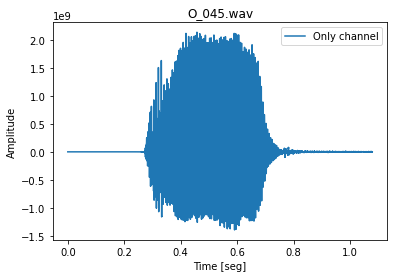

number of frames = 165016
number of channels = 1


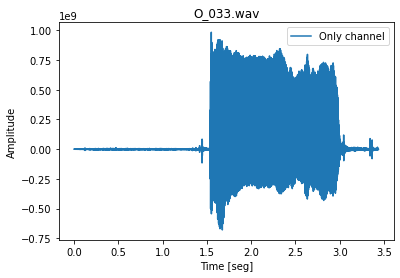

number of frames = 169608
number of channels = 1


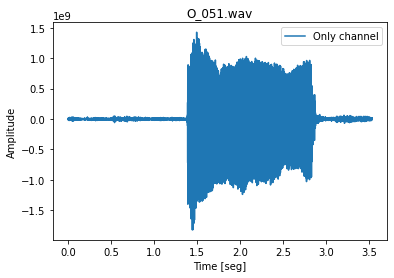

number of frames = 112216
number of channels = 1


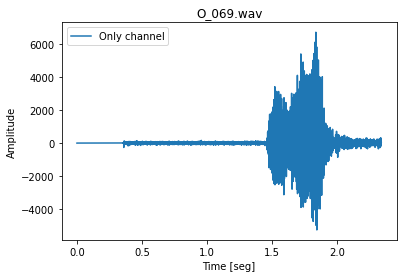

number of frames = 142936
number of channels = 1


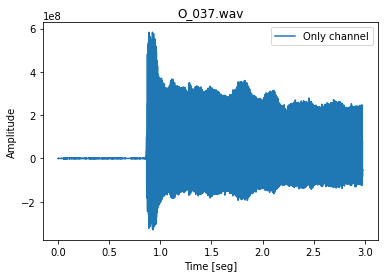

number of frames = 77448
number of channels = 1


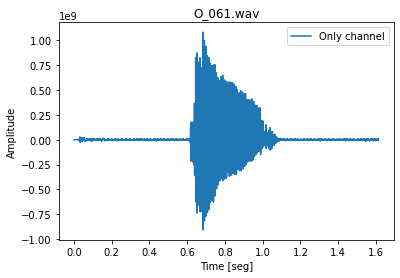

number of frames = 60376
number of channels = 1


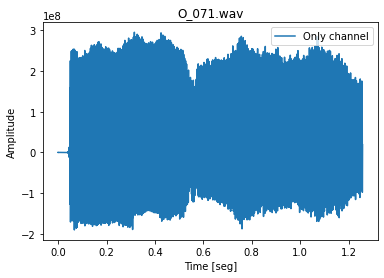

number of frames = 60376
number of channels = 1


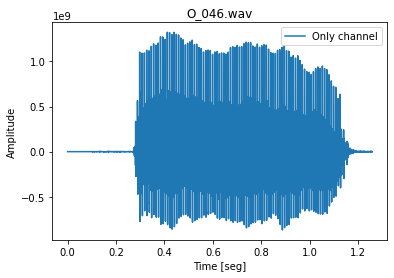

number of frames = 65928
number of channels = 1


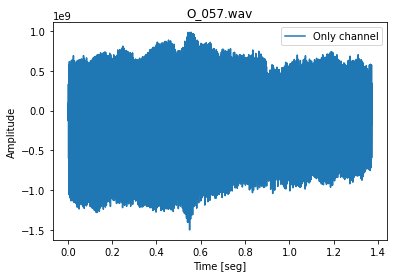

number of frames = 61128
number of channels = 1


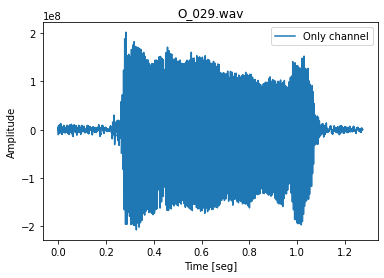

number of frames = 97816
number of channels = 1


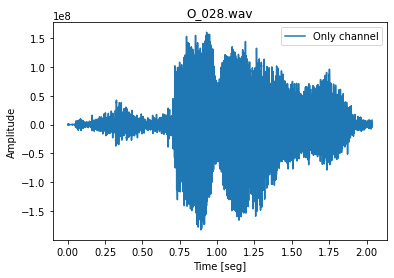

number of frames = 56536
number of channels = 1


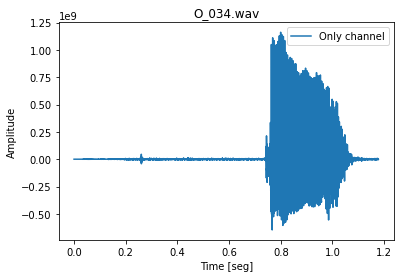

number of frames = 55576
number of channels = 1


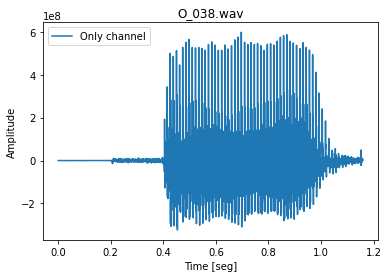

File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... no

In [108]:
for o in O_records:
    visualize_wav_info(path_O, o)

Visualizamos la información para las muestras de la clase **U**.

number of frames = 56536
number of channels = 2


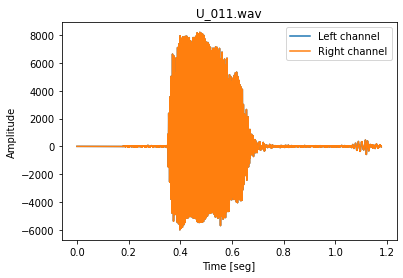

number of frames = 84707
number of channels = 2


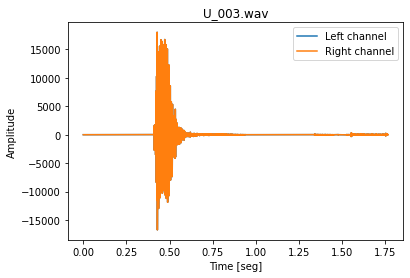

number of frames = 108113
number of channels = 2


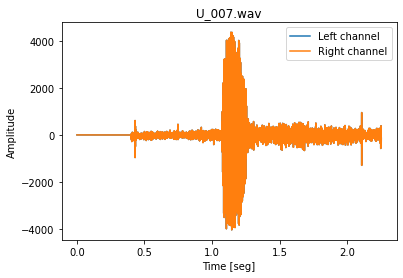

number of frames = 69981
number of channels = 1


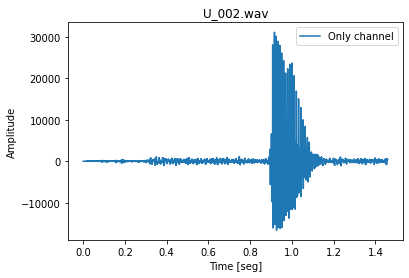

number of frames = 187096
number of channels = 2


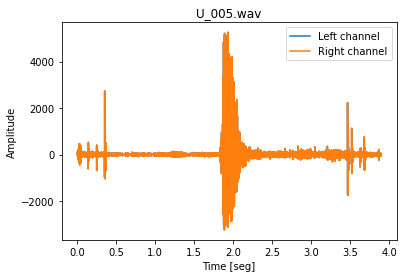

number of frames = 75736
number of channels = 2


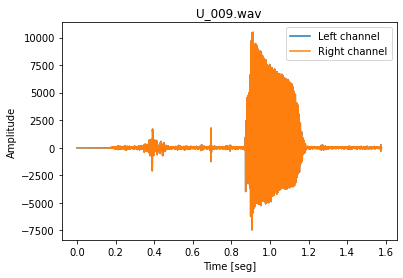

number of frames = 105883
number of channels = 2


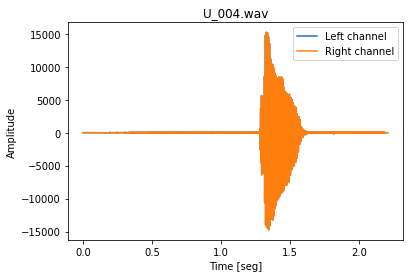

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()


number of frames = 116736
number of channels = 2


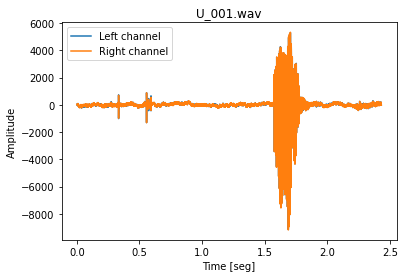

number of frames = 55576
number of channels = 2


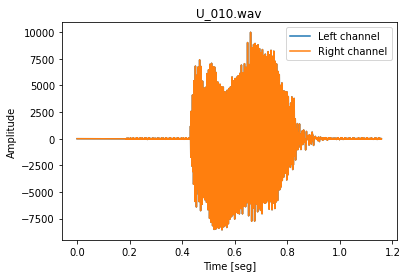

number of frames = 45016
number of channels = 2


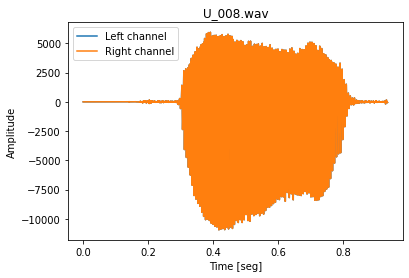

number of frames = 81363
number of channels = 2


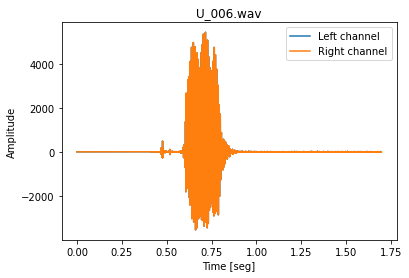

number of frames = 77656
number of channels = 1


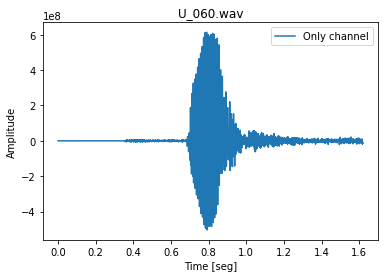

number of frames = 81288
number of channels = 1


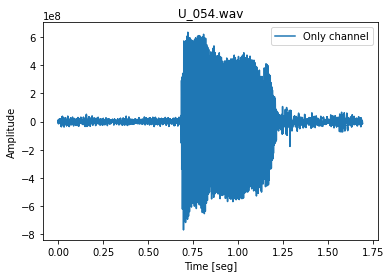

number of frames = 105496
number of channels = 1


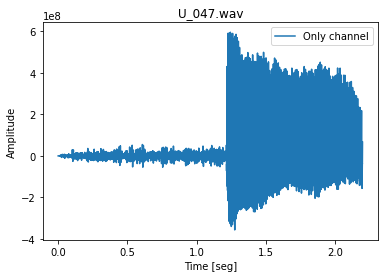

number of frames = 72648
number of channels = 1


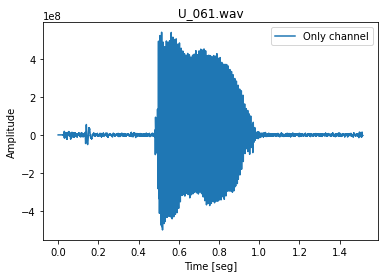

number of frames = 89176
number of channels = 1


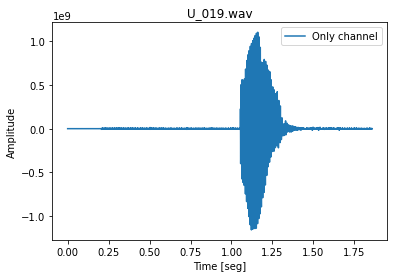

number of frames = 177288
number of channels = 1


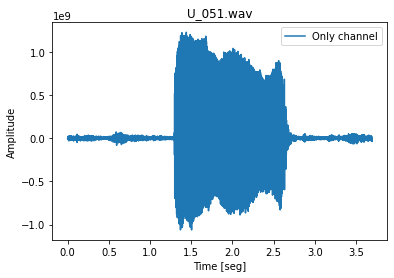

number of frames = 102616
number of channels = 1


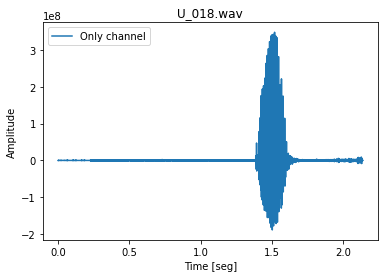

number of frames = 64216
number of channels = 1


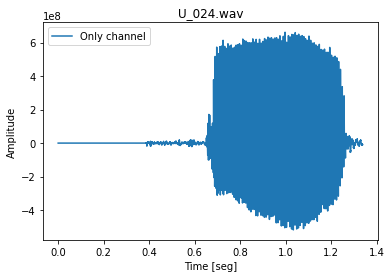

number of frames = 79368
number of channels = 1


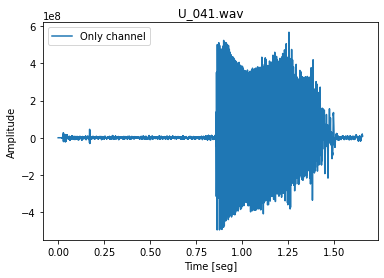

number of frames = 149656
number of channels = 1


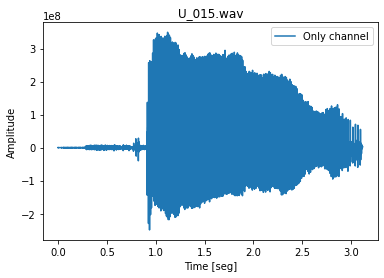

number of frames = 170568
number of channels = 1


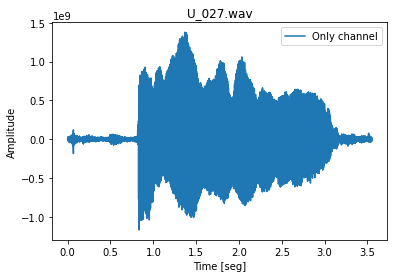

number of frames = 98568
number of channels = 1


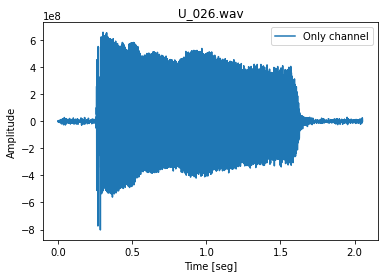

number of frames = 164056
number of channels = 1


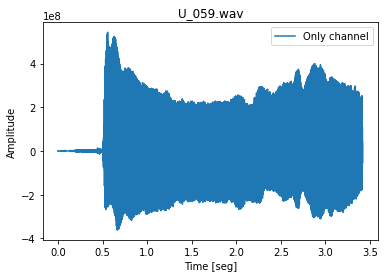

number of frames = 162136
number of channels = 1


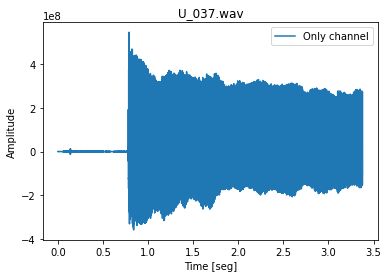

number of frames = 67848
number of channels = 1


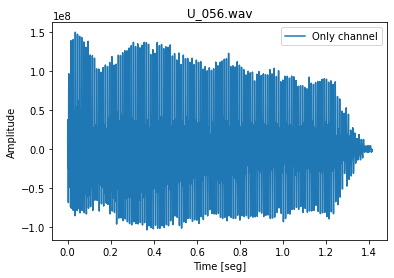

number of frames = 90136
number of channels = 1


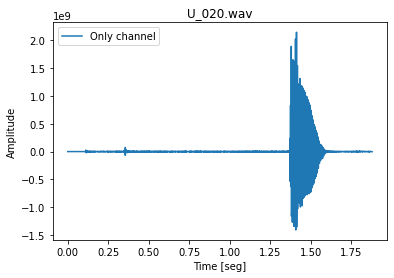

number of frames = 48856
number of channels = 1


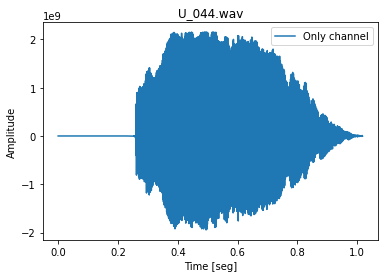

number of frames = 68056
number of channels = 2


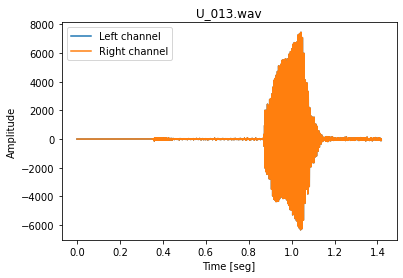

number of frames = 127576
number of channels = 1


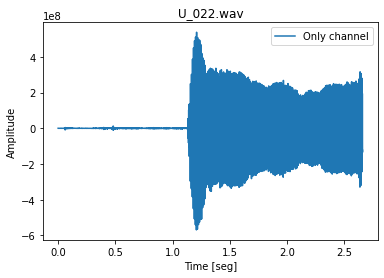

number of frames = 88216
number of channels = 1


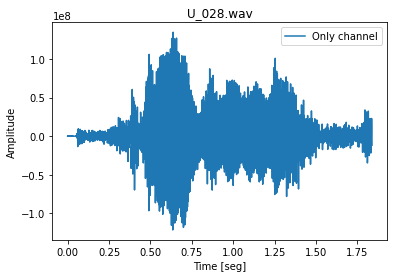

number of frames = 126616
number of channels = 1


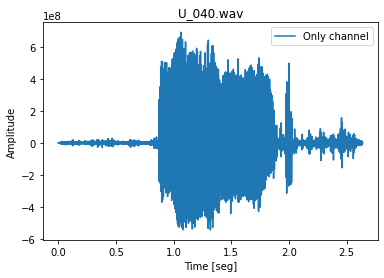

number of frames = 61336
number of channels = 1


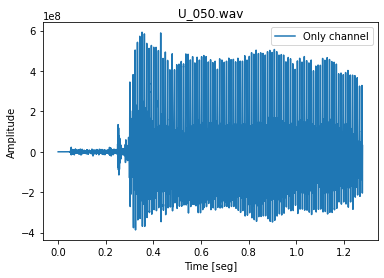

number of frames = 91096
number of channels = 1


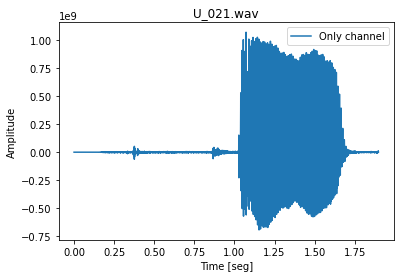

number of frames = 289920
number of channels = 1


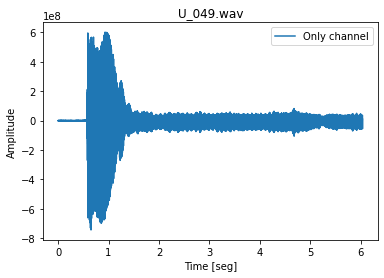

number of frames = 70728
number of channels = 1


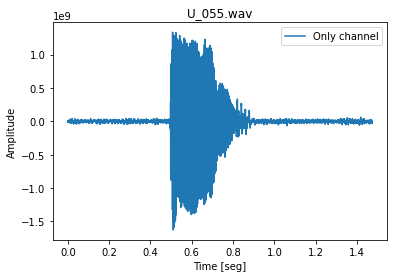

number of frames = 107416
number of channels = 1


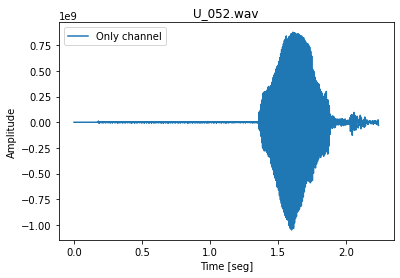

number of frames = 96856
number of channels = 1


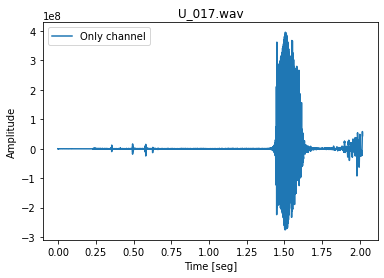

number of frames = 70936
number of channels = 1


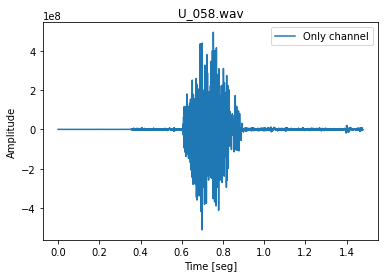

number of frames = 69976
number of channels = 2


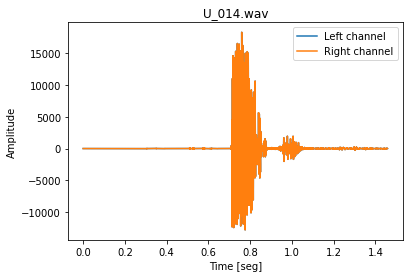

number of frames = 72856
number of channels = 1


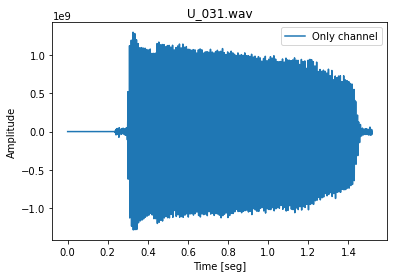

number of frames = 69768
number of channels = 1


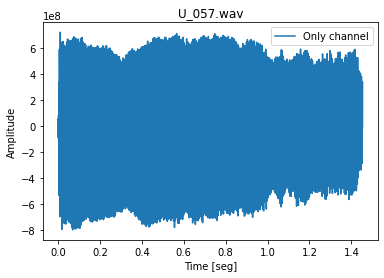

number of frames = 54616
number of channels = 1


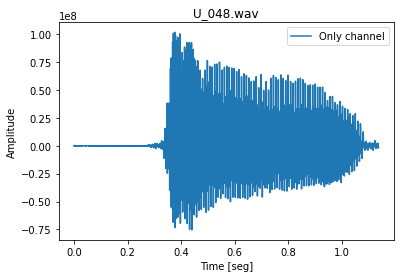

number of frames = 61336
number of channels = 1


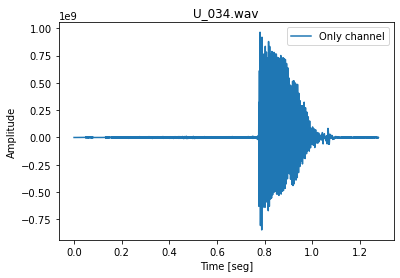

number of frames = 106248
number of channels = 1


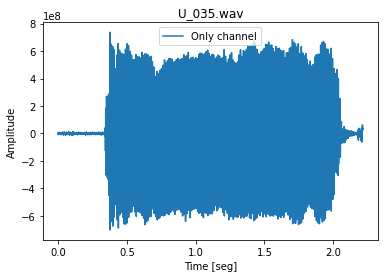

number of frames = 47896
number of channels = 1


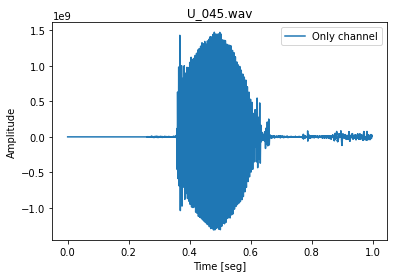

number of frames = 70936
number of channels = 2


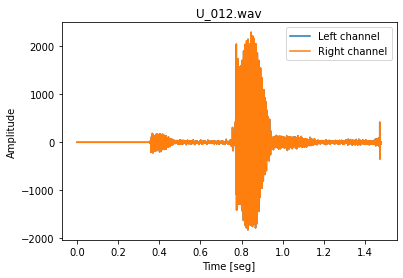

number of frames = 82248
number of channels = 1


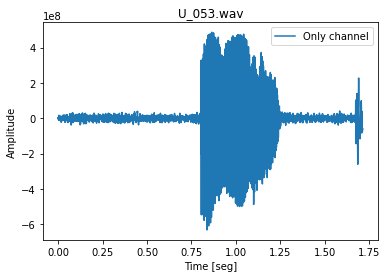

number of frames = 53656
number of channels = 1


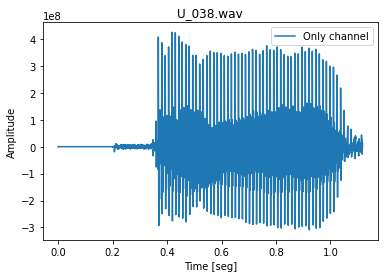

number of frames = 58248
number of channels = 1


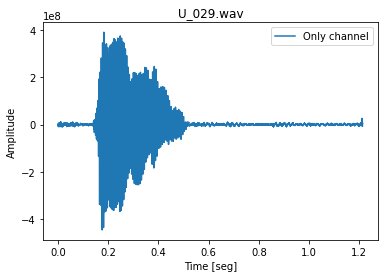

number of frames = 85128
number of channels = 1


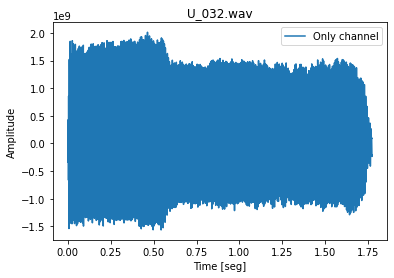

number of frames = 142936
number of channels = 1


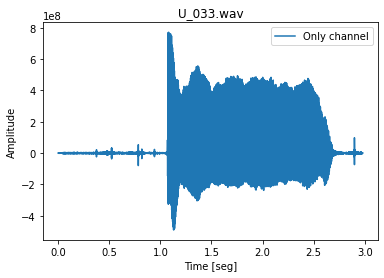

number of frames = 82456
number of channels = 1


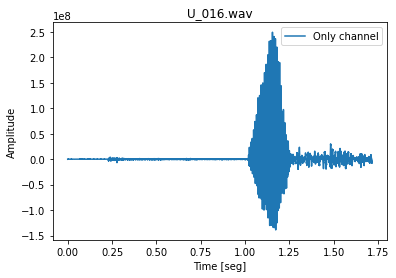

number of frames = 87256
number of channels = 1


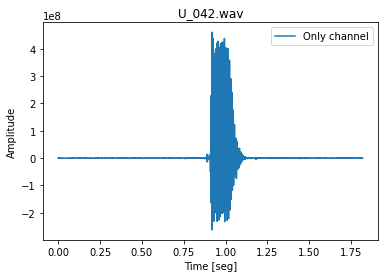

number of frames = 63256
number of channels = 1


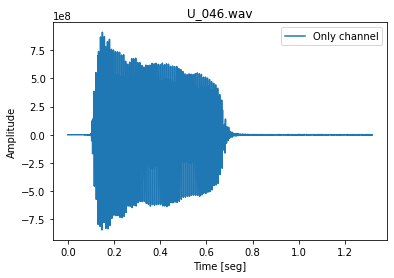

number of frames = 54616
number of channels = 1


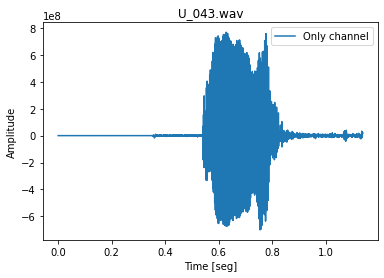

number of frames = 94728
number of channels = 1


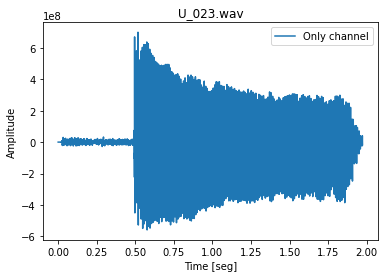

number of frames = 63256
number of channels = 1


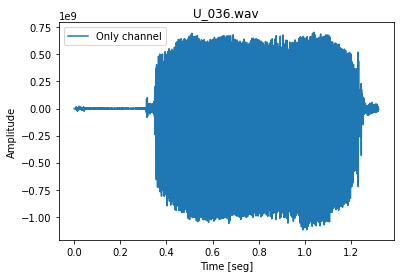

number of frames = 93016
number of channels = 1


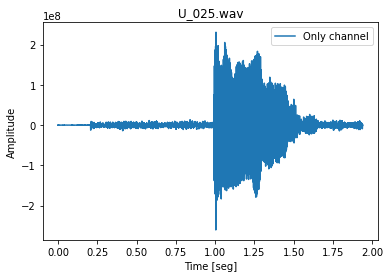

number of frames = 119896
number of channels = 1


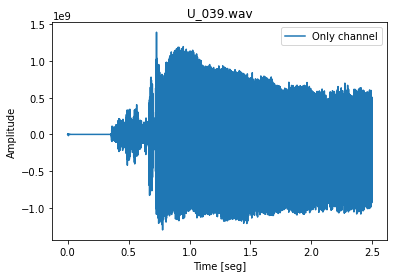

number of frames = 70728
number of channels = 1


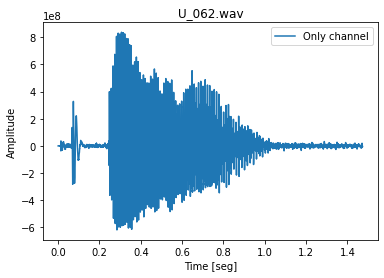

number of frames = 79576
number of channels = 1


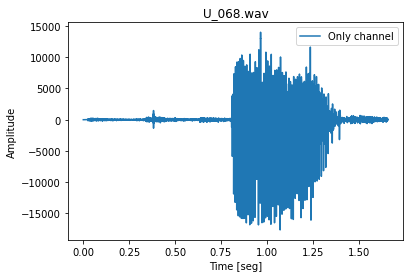

number of frames = 47896
number of channels = 1


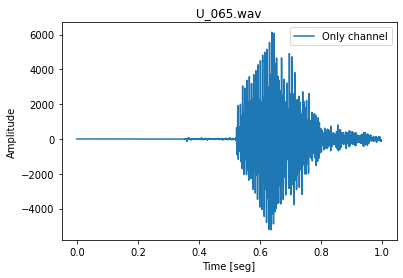

number of frames = 129496
number of channels = 1


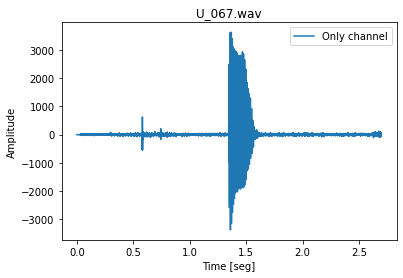

number of frames = 62296
number of channels = 1


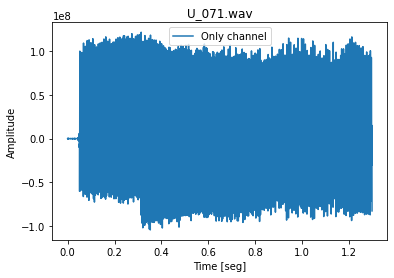

number of frames = 84376
number of channels = 1


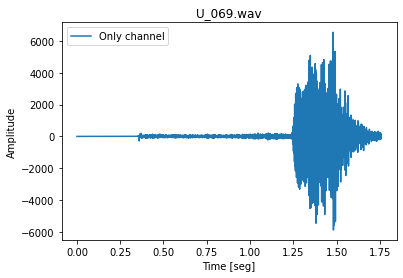

number of frames = 39189
number of channels = 1


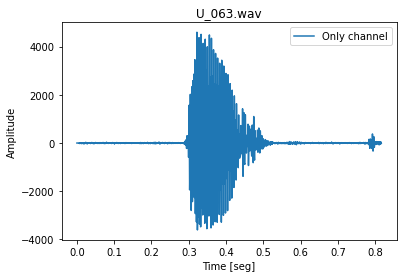

number of frames = 76906
number of channels = 1


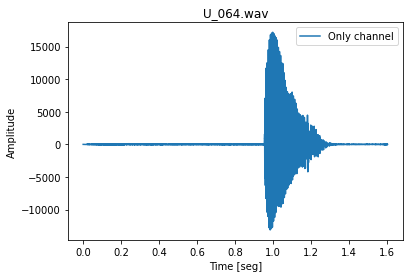

number of frames = 46936
number of channels = 1


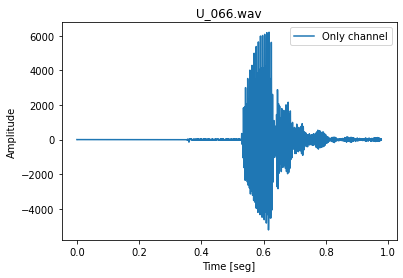

number of frames = 45976
number of channels = 1


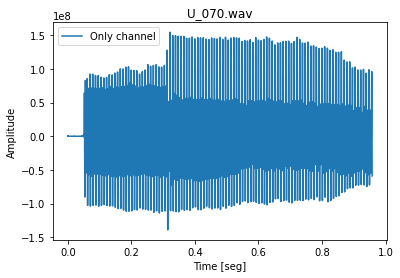

File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... not understood.
File format b'OggS'... no

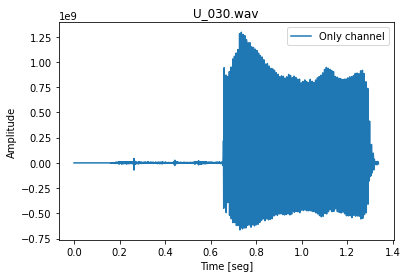

In [109]:
for u in U_records:
    visualize_wav_info(path_U, u)

Podemos notar algunas cosas que son importantes tener en cuenta:


1.   Algunas muestras de sonido corresponden a un **sonido estereo**, es decir, son una sucesión de valores para un altavoz izquierdo, y otro derecho. Pero, en realidad, solamente los registros del altavoz izquierdo son significativos, pues en el estereograma del canal derecho parece no existir. Esto puede detectarse facilmente en la información del archivo por medio de **shape**, ya que los sonidos estereos se caracterizan por **shape = (x, 2)**, mientras que los **mono auditivos** se caracterizan por **shape = (x,   )**. Esto también puede deducirse facilmente de los colores de las gráficas: cuando se trata de un **sonido estereo** hay dos curvas (azul y naranja), cuando no, solo una (azul).

2.   Las señales de sonido **no** están normalizadas.

3.   Visualmente, las señales de diferentes clases pueden parecerse mucho entre sí.

4.   No existe la misma cantidad de sonidos **estereo** que de sonidos **mono auditivos**.





#**Preprocesamiento de los datos**